In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Volume Data

### 1. initial reading

In [295]:
df_vol = pd.read_csv("../data/inbound_volume_data.csv", index_col=0)

In [296]:
df_vol.head()

Timestamp    Provider    Plant Actual Vol [Kg] Expected Vol [Kg]
0   2015/07  Provider_1  Plant_1           19096             20298
1   2015/08  Provider_1  Plant_1          187139            189973
2   2015/09  Provider_1  Plant_1          181149            187798
3   2015/10  Provider_1  Plant_1          202677            202327
4   2015/11  Provider_1  Plant_1          272902            271765

In [297]:
# Dataset Information
print("\nDataset Information:")
print(df_vol.info())
print(f"Number of rows: {len(df_vol)}")  # Number of rows
print(f"Number of columns: {len(df_vol.columns)}")  # Number of columns
print("\nData types per column:")
print(df_vol.dtypes)  # Data types of each column
print("\nMissing values per column:")
print(df_vol.isnull().sum())  # Number of missing values per column


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 47058 entries, 0 to 60518
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Timestamp          47058 non-null  object
 1   Provider           47058 non-null  object
 2   Plant              47058 non-null  object
 3   Actual Vol [Kg]    47055 non-null  object
 4   Expected Vol [Kg]  46951 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB
None
Number of rows: 47058
Number of columns: 5

Data types per column:
Timestamp            object
Provider             object
Plant                object
Actual Vol [Kg]      object
Expected Vol [Kg]    object
dtype: object

Missing values per column:
Timestamp              0
Provider               0
Plant                  0
Actual Vol [Kg]        3
Expected Vol [Kg]    107
dtype: int64


### 2. data type editing

In [298]:
df_vol['Timestamp']=pd.to_datetime(df_vol['Timestamp'], format='%Y/%m')
df_vol['Actual Vol [Kg]'] = df_vol['Actual Vol [Kg]'].str.replace('.', '')
df_vol['Actual Vol [Kg]']=pd.to_numeric(df_vol['Actual Vol [Kg]'],errors='coerce')
df_vol['Expected Vol [Kg]'] = df_vol['Expected Vol [Kg]'].str.replace('.', '')
df_vol['Expected Vol [Kg]'] = df_vol['Expected Vol [Kg]'].str.replace(',', '.')
df_vol['Expected Vol [Kg]']=pd.to_numeric(df_vol['Expected Vol [Kg]'],errors='coerce')

df_vol.head()

Timestamp    Provider    Plant  Actual Vol [Kg]  Expected Vol [Kg]
0 2015-07-01  Provider_1  Plant_1          19096.0            20298.0
1 2015-08-01  Provider_1  Plant_1         187139.0           189973.0
2 2015-09-01  Provider_1  Plant_1         181149.0           187798.0
3 2015-10-01  Provider_1  Plant_1         202677.0           202327.0
4 2015-11-01  Provider_1  Plant_1         272902.0           271765.0

### 3. Secondary analysis

In [299]:
# Dataset Information
print("\nDataset Information:")
print(f"Number of rows: {len(df_vol)}")  # Number of rows
print(f"Number of columns: {len(df_vol.columns)}")  # Number of columns
print("\nData types per column:")
print(df_vol.dtypes)  # Data types of each column
print("\nMissing values per column:")
print(df_vol.isnull().sum())  # Number of missing values per column
print("\nBasic Statistical Summary:")
print(df_vol.describe())  # Basic statistical summary for numerical columns


Dataset Information:
Number of rows: 47058
Number of columns: 5

Data types per column:
Timestamp            datetime64[ns]
Provider                     object
Plant                        object
Actual Vol [Kg]             float64
Expected Vol [Kg]           float64
dtype: object

Missing values per column:
Timestamp              0
Provider               0
Plant                  0
Actual Vol [Kg]        3
Expected Vol [Kg]    107
dtype: int64

Basic Statistical Summary:
                           Timestamp  Actual Vol [Kg]  Expected Vol [Kg]
count                          47058     4.705500e+04       4.695100e+04
mean   2018-05-12 19:43:06.510263552     4.446285e+05       8.292719e+05
min              2014-01-01 00:00:00     1.000000e+00       0.000000e+00
25%              2016-05-01 00:00:00     7.908550e+04       6.820250e+04
50%              2018-06-01 00:00:00     2.480090e+05       2.206440e+05
75%              2020-06-01 00:00:00     5.767820e+05       5.253174e+05
max         

In [300]:
unique_providers = df_vol['Provider'].unique()
print("\nProviders:")
print(unique_providers)
print(f'\nNumber of providers:{len(unique_providers)}')
register_by_provider =df_vol['Provider'].value_counts().sort_values(ascending=False)
print("\nNumber of registers by provider:")
print(register_by_provider )


Providers:
['Provider_1' 'Provider_2' 'Provider_3' 'Provider_4' 'Provider_5'
 'Provider_6' 'Provider_7' 'Provider_8' 'Provider_9' 'Provider_10'
 'Provider_11' 'Provider_12' 'Provider_13' 'Provider_14' 'Provider_15'
 'Provider_16' 'Provider_17' 'Provider_18' 'Provider_19' 'Provider_20'
 'Provider_21' 'Provider_22' 'Provider_23' 'Provider_24' 'Provider_25'
 'Provider_26' 'Provider_27' 'Provider_28' 'Provider_29' 'Provider_30'
 'Provider_31' 'Provider_32' 'Provider_33' 'Provider_34' 'Provider_35'
 'Provider_36' 'Provider_37' 'Provider_38']

Number of providers:38

Number of registers by provider:
Provider
Provider_3     1779
Provider_25    1772
Provider_27    1767
Provider_24    1762
Provider_9     1762
Provider_20    1758
Provider_2     1758
Provider_10    1756
Provider_22    1751
Provider_21    1748
Provider_29    1741
Provider_30    1735
Provider_31    1732
Provider_19    1717
Provider_7     1716
Provider_28    1714
Provider_4     1691
Provider_5     1688
Provider_14    1687
Provider_

In [301]:
unique_plants = df_vol['Plant'].unique()
print("\nUnique_plants:")
print(unique_plants)
print(f'\nNumber of plants:{len(unique_plants)}')
register_by_plant =df_vol['Plant'].value_counts().sort_values(ascending=False)
print("\nNumber of registers by plant:")
print(register_by_plant )


Unique_plants:
['Plant_1' 'Plant_3' 'Plant_4' 'Plant_5' 'Plant_6' 'Plant_9' 'Plant_10'
 'Plant_11' 'Plant_12' 'Plant_13' 'Plant_14' 'Plant_15' 'Plant_17'
 'Plant_18' 'Plant_19' 'Plant_20' 'Plant_21' 'Plant_22']

Number of plants:18

Number of registers by plant:
Plant
Plant_19    2922
Plant_18    2907
Plant_4     2898
Plant_13    2881
Plant_15    2852
Plant_20    2844
Plant_10    2835
Plant_12    2719
Plant_3     2716
Plant_6     2591
Plant_17    2586
Plant_9     2580
Plant_14    2542
Plant_21    2520
Plant_11    2508
Plant_5     2263
Plant_1     2088
Plant_22    1806
Name: count, dtype: int64


In [302]:
print(df_vol.groupby(['Plant','Provider']).count())
   

                     Timestamp  Actual Vol [Kg]  Expected Vol [Kg]
Plant   Provider                                                  
Plant_1 Provider_1          48               48                 48
        Provider_10         88               88                 88
        Provider_14         87               87                 87
        Provider_15         43               43                 43
        Provider_16         38               38                 38
...                        ...              ...                ...
Plant_9 Provider_5          93               93                 93
        Provider_6          93               93                 93
        Provider_7          93               93                 93
        Provider_8          93               93                 93
        Provider_9          93               93                 93

[624 rows x 3 columns]


In [322]:
df_vol.groupby(['Plant','Provider']).count().to_csv("prueba.csv")

In [303]:
unique_combinations=df_vol.groupby([ 'Plant','Provider']).size().reset_index(name='Count').sort_values(by='Count')
print(f'Number of Unique combinations: {len(unique_combinations)}')
print(f'Unique combinations: \n{unique_combinations}')

all_possible_combinations = pd.MultiIndex.from_product([df_vol['Plant'].unique(),df_vol['Provider'].unique()], names=[ 'Plant','Provider'])
existing_combinations = pd.MultiIndex.from_frame(df_vol[['Plant','Provider']])
missing_combinations = all_possible_combinations.difference(existing_combinations)
print(f'Number of missing combinations: {len(missing_combinations)}')
print(f'\nMissing combinations: \n{missing_combinations}')


Number of Unique combinations: 624
Unique combinations: 
        Plant     Provider  Count
211  Plant_15  Provider_13      1
444  Plant_22  Provider_38      1
27    Plant_1  Provider_38      1
513   Plant_4  Provider_38      1
97   Plant_11  Provider_38      1
..        ...          ...    ...
323  Plant_19   Provider_2    106
324  Plant_19  Provider_20    106
313  Plant_18   Provider_9    106
358  Plant_20   Provider_2    106
331  Plant_19  Provider_27    113

[624 rows x 3 columns]
Number of missing combinations: 60

Missing combinations: 
MultiIndex([( 'Plant_1', 'Provider_11'),
            ( 'Plant_1', 'Provider_12'),
            ( 'Plant_1', 'Provider_13'),
            ( 'Plant_1', 'Provider_26'),
            ('Plant_10', 'Provider_11'),
            ('Plant_10', 'Provider_12'),
            ('Plant_10', 'Provider_13'),
            ('Plant_11', 'Provider_11'),
            ('Plant_11', 'Provider_12'),
            ('Plant_11', 'Provider_13'),
            ('Plant_12', 'Provider_11'),
 

# Production Data

In [304]:
df_prod = pd.read_csv("../data/production_data.csv", index_col=0)

In [305]:
df_prod.head()

Timestamp  Plant_6  Plant_9  Plant_13  Plant_15  Plant_17  Plant_19  \
0   2014/01    11848    54138     33839     19438      6770     29098   
1   2014/02    13528    53063     36690     24252      6943     26975   
2   2014/03    12753    50551     38211     24978      7695     28991   
3   2014/04    12681    52528     36979     23872      7436     27409   
4   2014/05    13272    50855     31164     24145      7415     27959   

   Plant_21  Plant_11  Plant_4  Plant_12  Plant_20  Plant_14  Plant_22  \
0     45147      8578   326919     11668     93855     68067     13127   
1     42656      9739   334540     11275     92865     66012     18565   
2     46226     10619   356075     12306     99860     71251     19505   
3     47929     10379   351736     11790     95409     66233     23983   
4     47255     12155   332888     10407     97371     69890     21139   

   Plant_1  Plant_3  Plant_5  Plant_18  Plant_10  
0    26363    26363     5799     13749      3633  
1    29822    29822     7978     12880      2880  
2    28915    28915     8149     13348      4165  
3    29441    29441     5020     15650      4457  
4    28110    28110     7087     15940      4035

In [306]:
# Dataset Information
print("\nDataset Information:")
print(df_prod.info())
print(f"Number of rows: {len(df_prod)}")  # Number of rows
print(f"Number of columns: {len(df_prod.columns)}")  # Number of columns
print("\nData types per column:")
print(df_prod.dtypes)  # Data types of each column
print("\nMissing values per column:")
print(df_prod.isnull().sum())  # Number of missing values per column


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  120 non-null    object
 1   Plant_6    120 non-null    int64 
 2   Plant_9    120 non-null    int64 
 3   Plant_13   120 non-null    int64 
 4   Plant_15   120 non-null    int64 
 5   Plant_17   120 non-null    int64 
 6   Plant_19   120 non-null    int64 
 7   Plant_21   120 non-null    int64 
 8   Plant_11   120 non-null    int64 
 9   Plant_4    120 non-null    int64 
 10  Plant_12   120 non-null    int64 
 11  Plant_20   120 non-null    int64 
 12  Plant_14   120 non-null    int64 
 13  Plant_22   120 non-null    int64 
 14  Plant_1    120 non-null    int64 
 15  Plant_3    120 non-null    int64 
 16  Plant_5    120 non-null    int64 
 17  Plant_18   120 non-null    int64 
 18  Plant_10   120 non-null    int64 
dtypes: int64(18), object(1)
memory usage: 18.8+ KB
None
Nu

### 2. Data type editing

In [307]:
df_prod['Timestamp']=pd.to_datetime(df_prod['Timestamp'], format='%Y/%m')
df_prod.head()

Timestamp  Plant_6  Plant_9  Plant_13  Plant_15  Plant_17  Plant_19  \
0 2014-01-01    11848    54138     33839     19438      6770     29098   
1 2014-02-01    13528    53063     36690     24252      6943     26975   
2 2014-03-01    12753    50551     38211     24978      7695     28991   
3 2014-04-01    12681    52528     36979     23872      7436     27409   
4 2014-05-01    13272    50855     31164     24145      7415     27959   

   Plant_21  Plant_11  Plant_4  Plant_12  Plant_20  Plant_14  Plant_22  \
0     45147      8578   326919     11668     93855     68067     13127   
1     42656      9739   334540     11275     92865     66012     18565   
2     46226     10619   356075     12306     99860     71251     19505   
3     47929     10379   351736     11790     95409     66233     23983   
4     47255     12155   332888     10407     97371     69890     21139   

   Plant_1  Plant_3  Plant_5  Plant_18  Plant_10  
0    26363    26363     5799     13749      3633  
1    29822    29822     7978     12880      2880  
2    28915    28915     8149     13348      4165  
3    29441    29441     5020     15650      4457  
4    28110    28110     7087     15940      4035

In [308]:
melted_df_prod = df_prod.melt(id_vars=['Timestamp'], var_name='Plant', value_name='Production')
print(melted_df_prod)

      Timestamp     Plant  Production
0    2014-01-01   Plant_6       11848
1    2014-02-01   Plant_6       13528
2    2014-03-01   Plant_6       12753
3    2014-04-01   Plant_6       12681
4    2014-05-01   Plant_6       13272
...         ...       ...         ...
2155 2023-08-01  Plant_10        2061
2156 2023-09-01  Plant_10        6111
2157 2023-10-01  Plant_10        5778
2158 2023-11-01  Plant_10        6332
2159 2023-12-01  Plant_10        4757

[2160 rows x 3 columns]


# Analysis between datasets

In [309]:
# Grouping and summing 'Actual Volume [Kg]' by 'timeset' and 'plant'
produce_vs_received = df_vol.groupby(['Timestamp', 'Plant']).agg({
    'Actual Vol [Kg]': 'sum',
    'Expected Vol [Kg]': 'sum'
}).reset_index()

# Merge the production data from df_prod into summed_actual_volume based on both 'Timestamp' and 'plant'
produce_vs_received = pd.merge(produce_vs_received, melted_df_prod, on=['Timestamp','Plant'], how='left')

# Add a new column 'Difference' to calculate the difference between 'Expected Vol [Kg]' and 'Actual Vol [Kg]'
produce_vs_received['Difference'] = produce_vs_received['Expected Vol [Kg]'] - produce_vs_received['Actual Vol [Kg]']


#Ratio ['Actual Vol kg']/['Production'] having in mind that production can take a 0 value
produce_vs_received['Ratio'] = np.where(
    produce_vs_received['Production'] != 0, 
    produce_vs_received['Actual Vol [Kg]'] / produce_vs_received['Production'], 
    np.nan
)


print(produce_vs_received)


# Calculate the correlation between 'Actual Vol kg' and 'Production'
correlation = produce_vs_received['Actual Vol [Kg]'].corr(produce_vs_received['Production'])

print(f"Correlation coefficient between 'Actual Vol kg' and 'Production': {correlation}")

      Timestamp     Plant  Actual Vol [Kg]  Expected Vol [Kg]  Production  \
0    2014-01-01  Plant_10        4166476.0          4107710.0        3633   
1    2014-01-01  Plant_11        2768938.0          2610310.0        8578   
2    2014-01-01  Plant_12        3885615.0          2598812.0       11668   
3    2014-01-01  Plant_13       19005764.0         18513040.0       33839   
4    2014-01-01  Plant_14        4346333.0          4335248.0       68067   
...         ...       ...              ...                ...         ...   
1800 2022-10-01  Plant_20       12966890.0          4992758.0       34582   
1801 2022-10-01  Plant_22         144592.0           144947.0       89225   
1802 2022-10-01   Plant_4       18606479.0         17115672.0      280588   
1803 2022-10-01   Plant_5        5456730.0          3846482.0       15303   
1804 2022-10-01   Plant_6          26818.0            24356.0       15411   

      Difference        Ratio  
0       -58766.0  1146.841729  
1      -158

In [310]:
print(produce_vs_received.info())
print(produce_vs_received.describe())
print(produce_vs_received['Ratio'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          1805 non-null   datetime64[ns]
 1   Plant              1805 non-null   object        
 2   Actual Vol [Kg]    1805 non-null   float64       
 3   Expected Vol [Kg]  1805 non-null   float64       
 4   Production         1805 non-null   int64         
 5   Difference         1805 non-null   float64       
 6   Ratio              1787 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 98.8+ KB
None
                           Timestamp  Actual Vol [Kg]  Expected Vol [Kg]  \
count                           1805     1.805000e+03       1.805000e+03   
mean   2018-05-03 15:46:10.304709120     1.159113e+07       2.157072e+07   
min              2014-01-01 00:00:00     2.250000e+02       3.700000e+01   
25%     

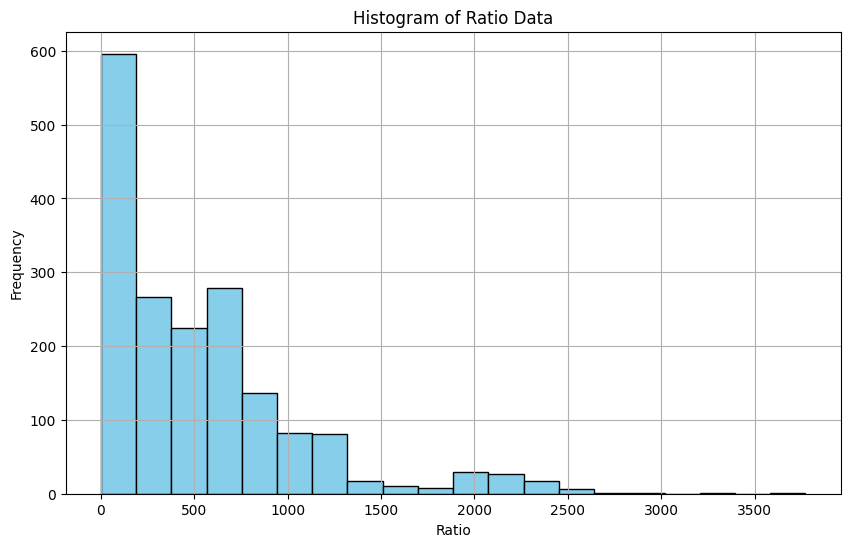

In [311]:
# Filtering out NaN values before plotting the histogram
ratio_data = produce_vs_received['Ratio'].dropna()

# Creating a histogram
plt.figure(figsize=(10, 6))
plt.hist(ratio_data, bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Histogram of Ratio Data')
plt.xlabel('Ratio')
plt.ylabel('Frequency')

# Display the histogram
plt.grid(True)
plt.show()


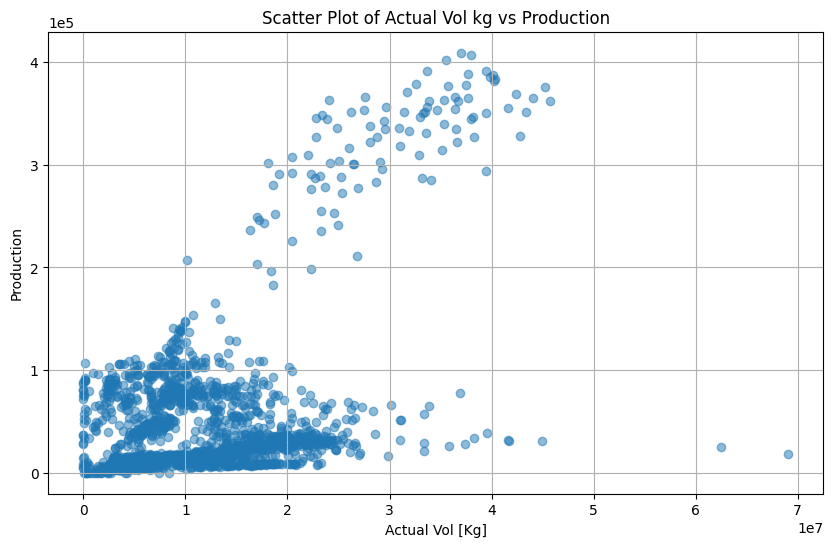

In [312]:
# Plotting a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(produce_vs_received['Actual Vol [Kg]'], produce_vs_received['Production'], alpha=0.5)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title('Scatter Plot of Actual Vol kg vs Production')
plt.xlabel('Actual Vol [Kg]')
plt.ylabel('Production')
plt.grid(True)
plt.show()


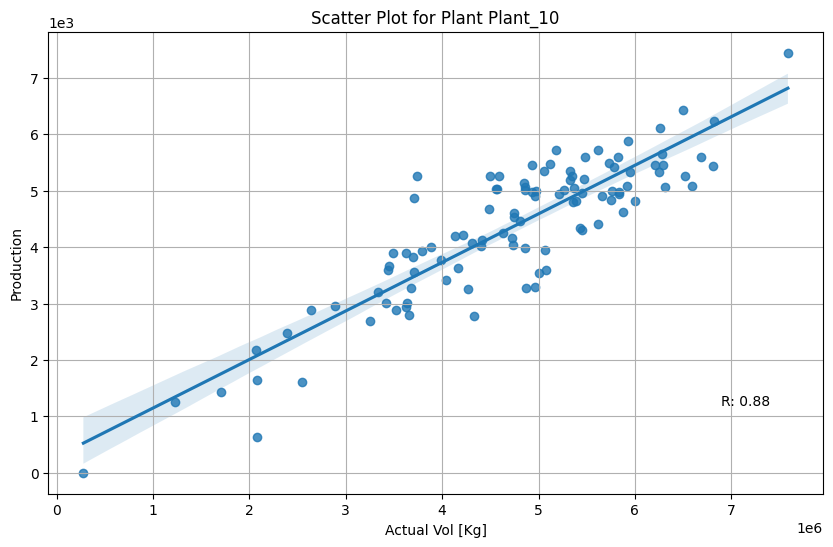

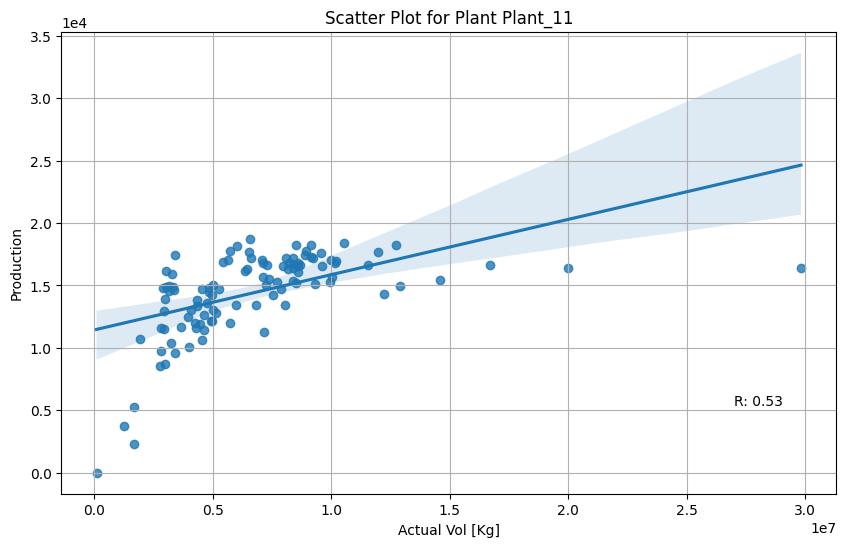

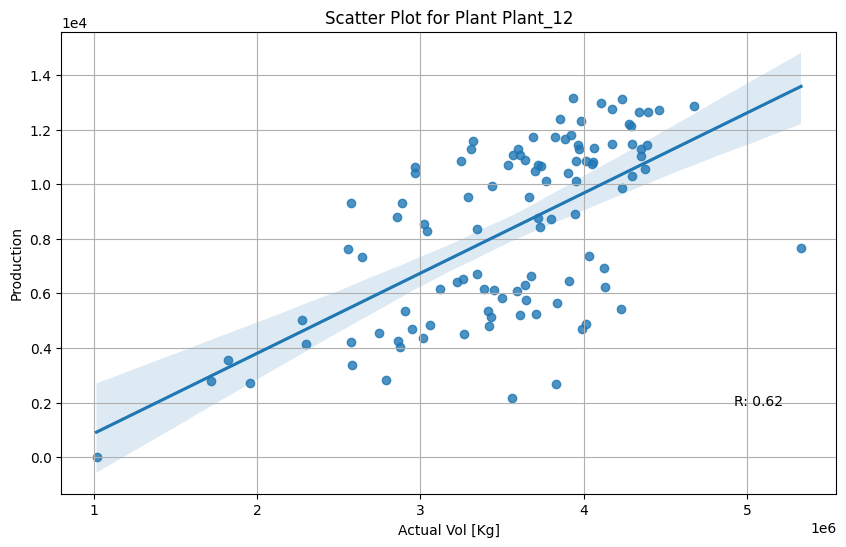

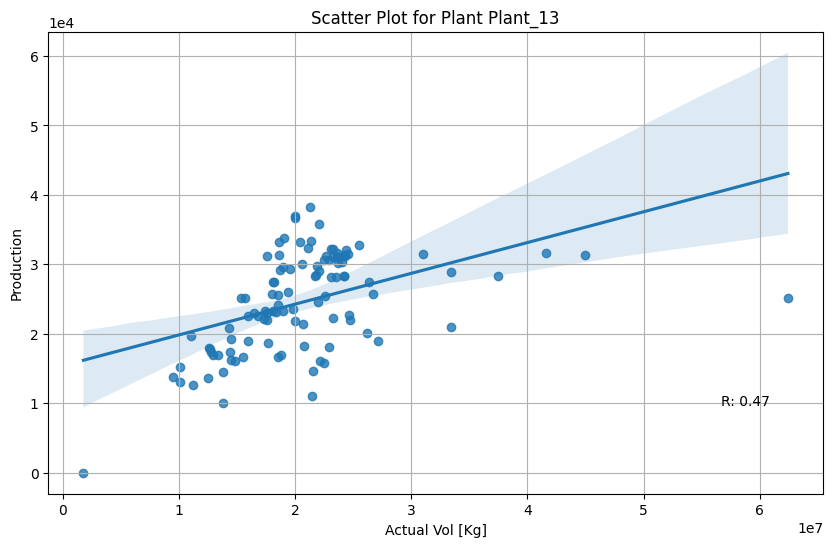

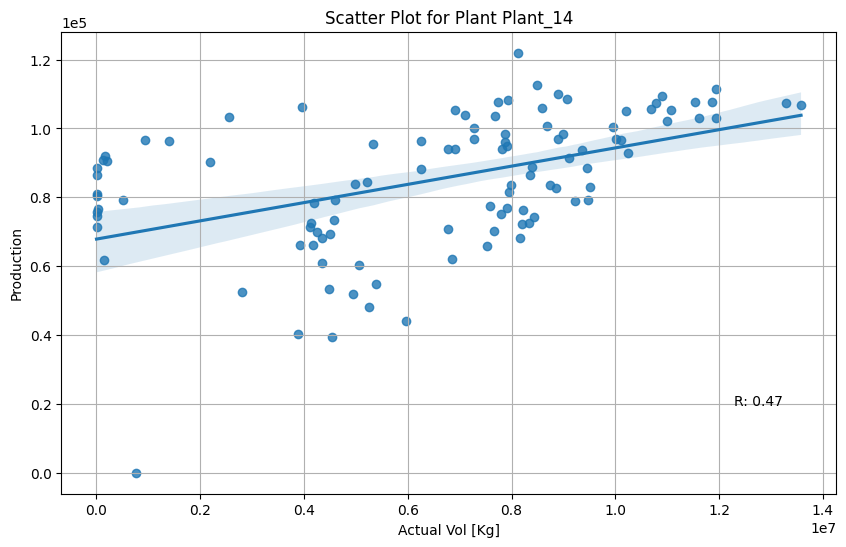

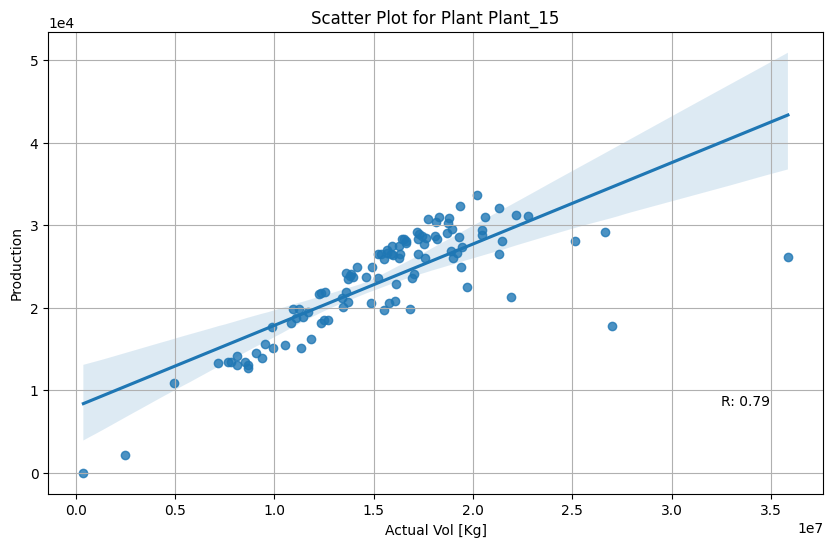

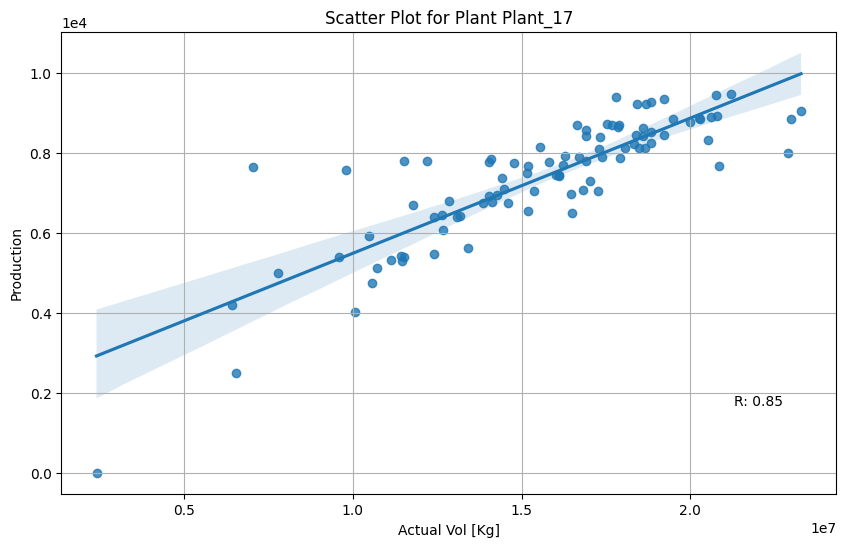

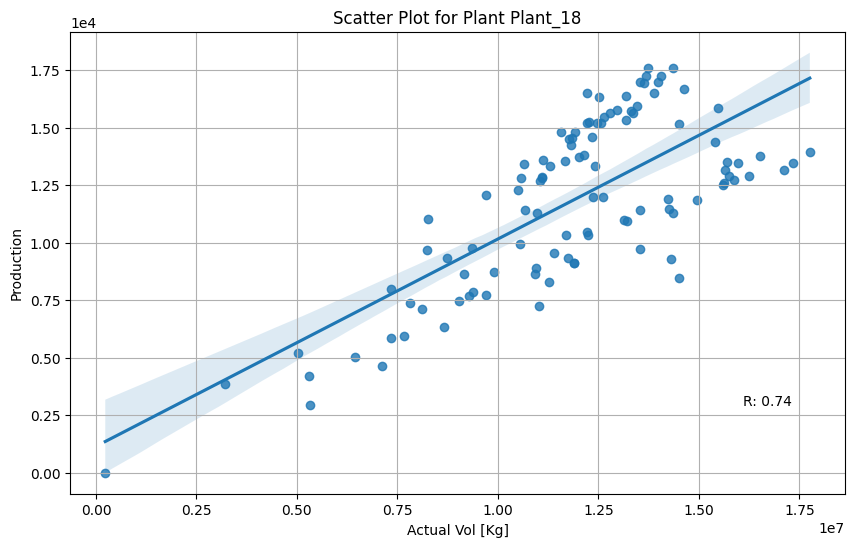

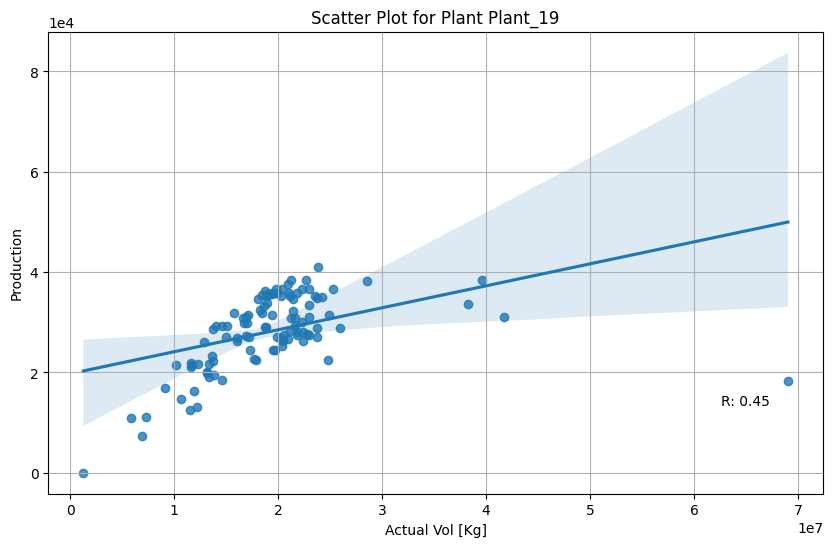

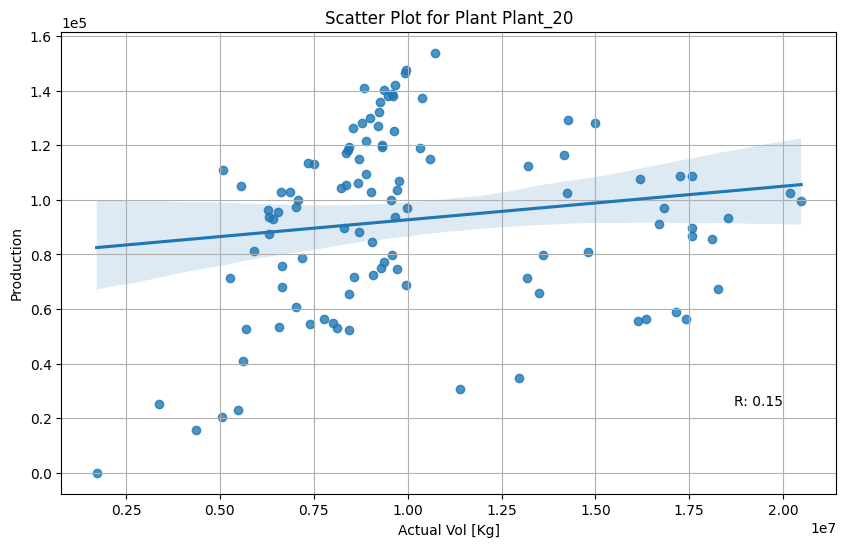

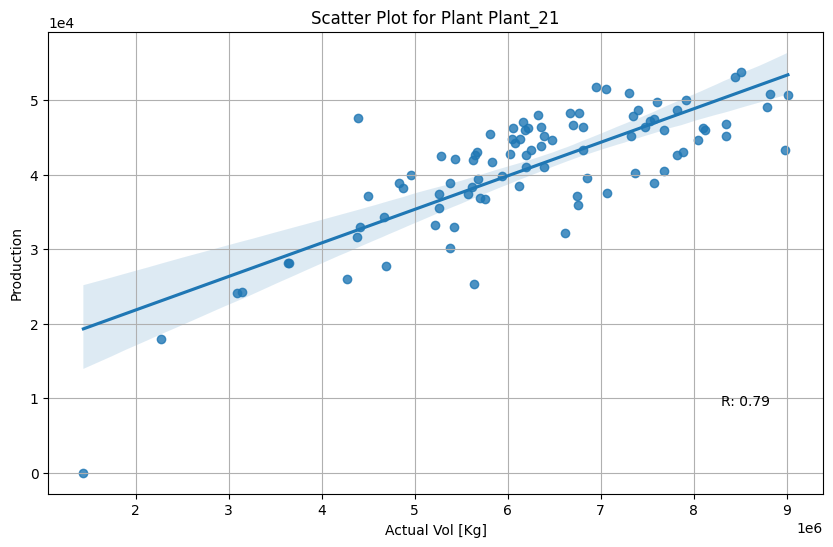

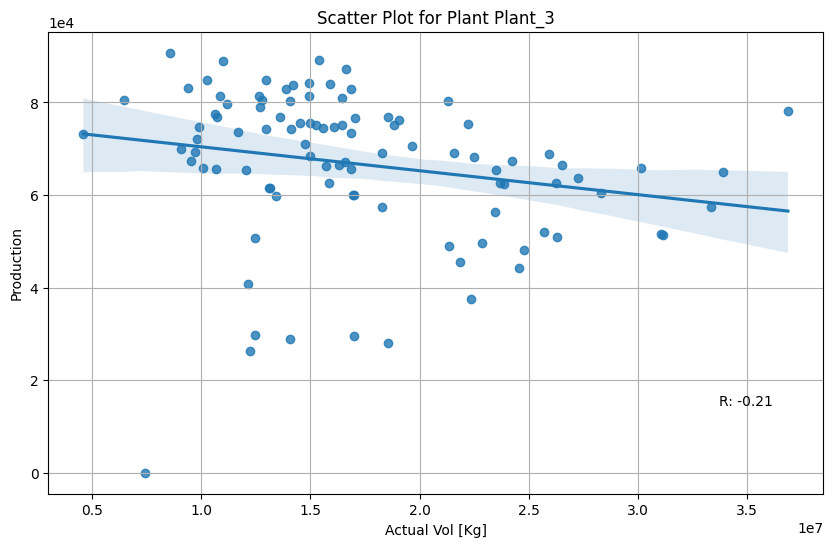

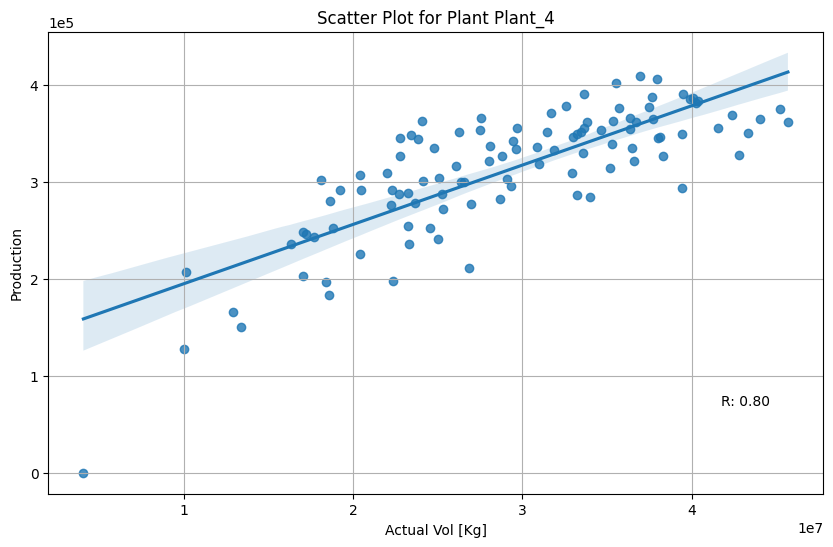

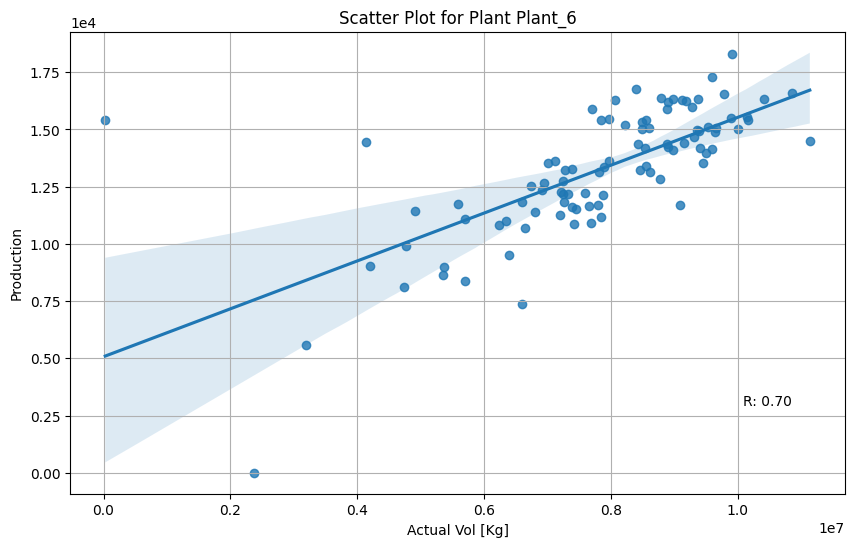

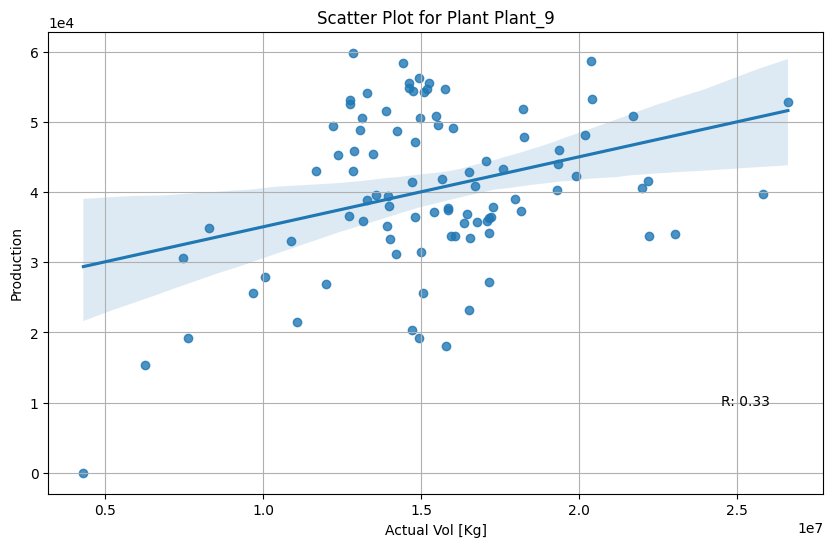

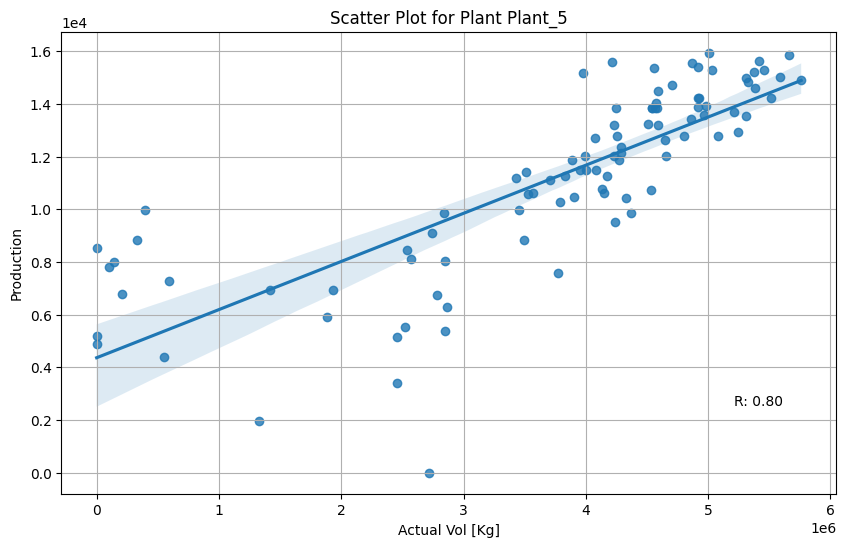

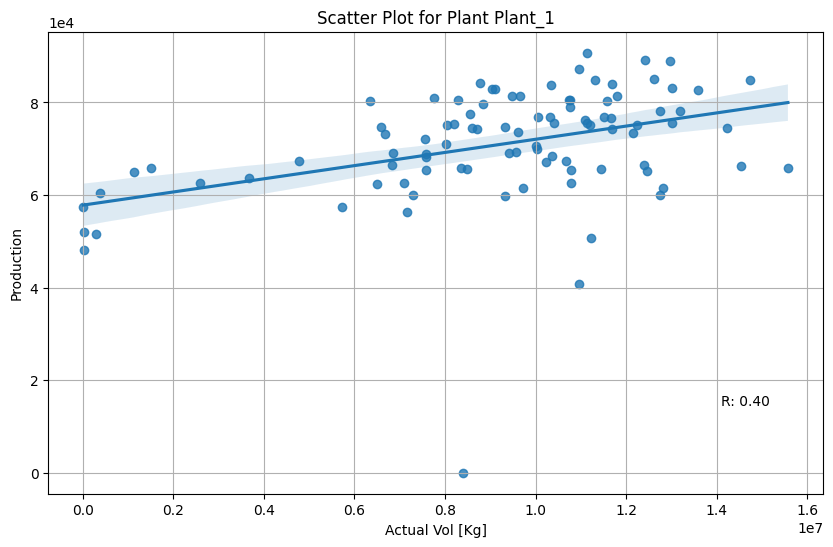

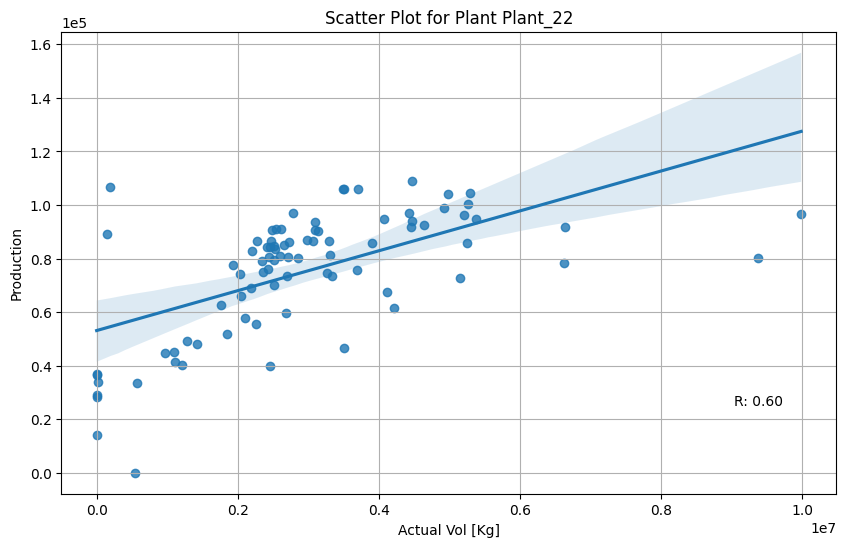

In [313]:
# Get unique plant names from the DataFrame
unique_plants = produce_vs_received['Plant'].unique()

# Loop through each unique plant and create a separate plot for each
for plant in unique_plants:
    # Filter data for the current plant
    plant_data = produce_vs_received[produce_vs_received['Plant'] == plant]
    
    # Create a plot for the current plant
    
    plt.figure(figsize=(10, 6))
    # Scatter plot with Seaborn's regression line
    sns.regplot(x='Actual Vol [Kg]', y='Production', data=plant_data)
    
    # Calculate and display the correlation coefficient
    correlation_coefficient = plant_data['Actual Vol [Kg]'].corr(plant_data['Production'])
    plt.text(0.9, 0.2, f'R: {correlation_coefficient:.2f}', 
             horizontalalignment='center', verticalalignment='center', 
             transform=plt.gca().transAxes)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    plt.title(f'Scatter Plot for Plant {plant}')
    plt.xlabel('Actual Vol [Kg]')
    plt.ylabel('Production')
    plt.grid(True)
    plt.show()  # Display the plot for the current plant



### Time

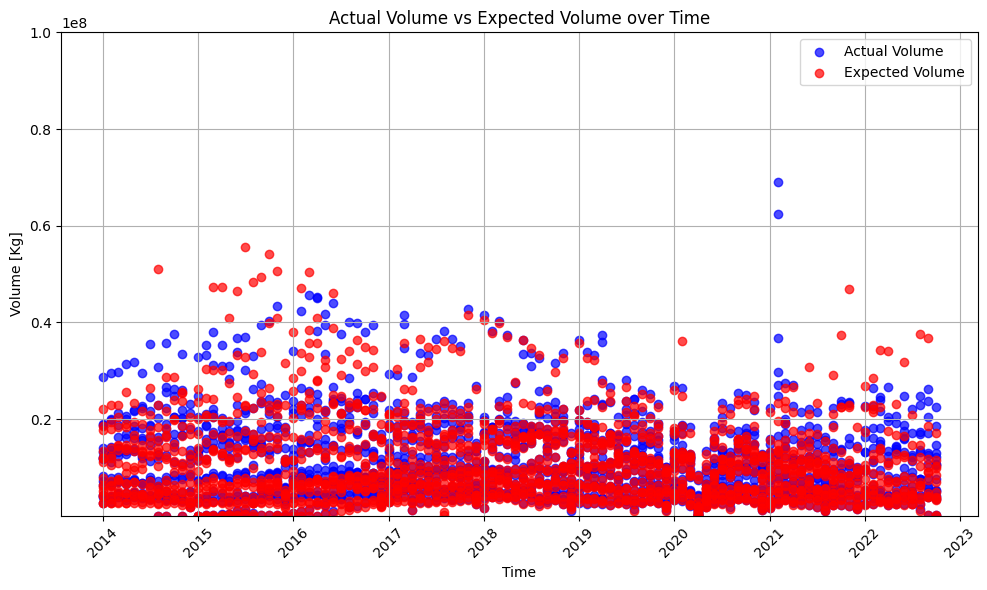

In [314]:
## PLOT: Actual Volume vs Expected Volume over Time
plt.figure(figsize=(10, 6))
plt.scatter(produce_vs_received['Timestamp'], produce_vs_received['Actual Vol [Kg]'], label='Actual Volume', color='blue', alpha=0.7)
plt.scatter(produce_vs_received['Timestamp'], produce_vs_received['Expected Vol [Kg]'], label='Expected Volume', color='red', alpha=0.7)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Volume [Kg]')
plt.title('Actual Volume vs Expected Volume over Time')

# Limit the y-axis to 1.0x10^7 (10,000,000)
plt.ylim(0.5, 1.0e8)

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

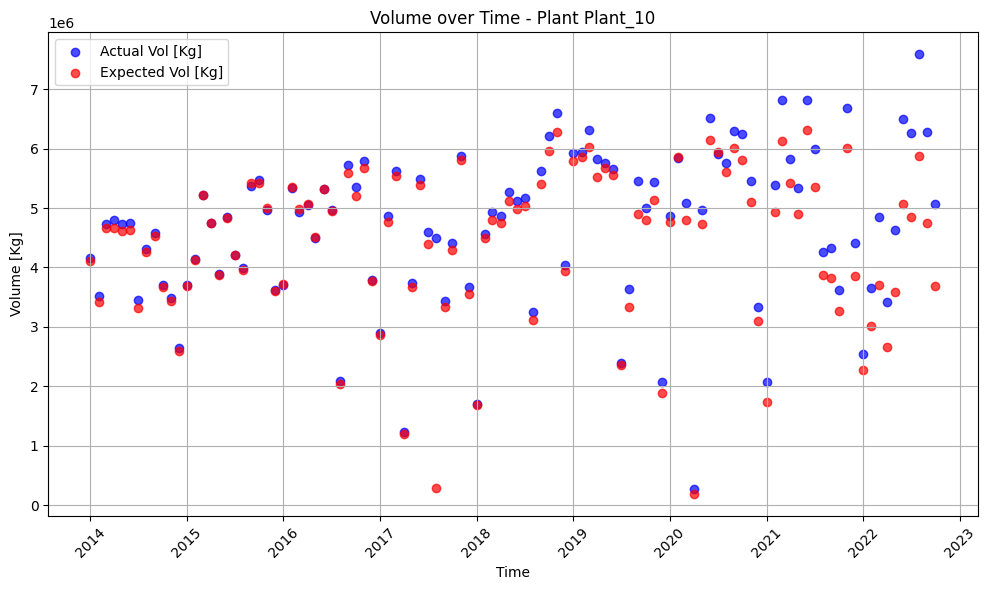

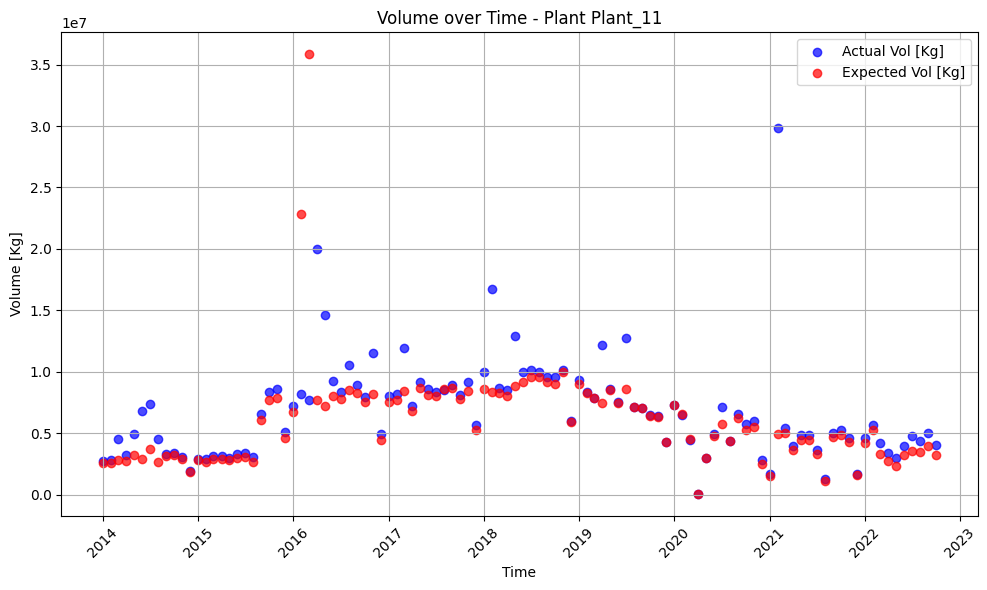

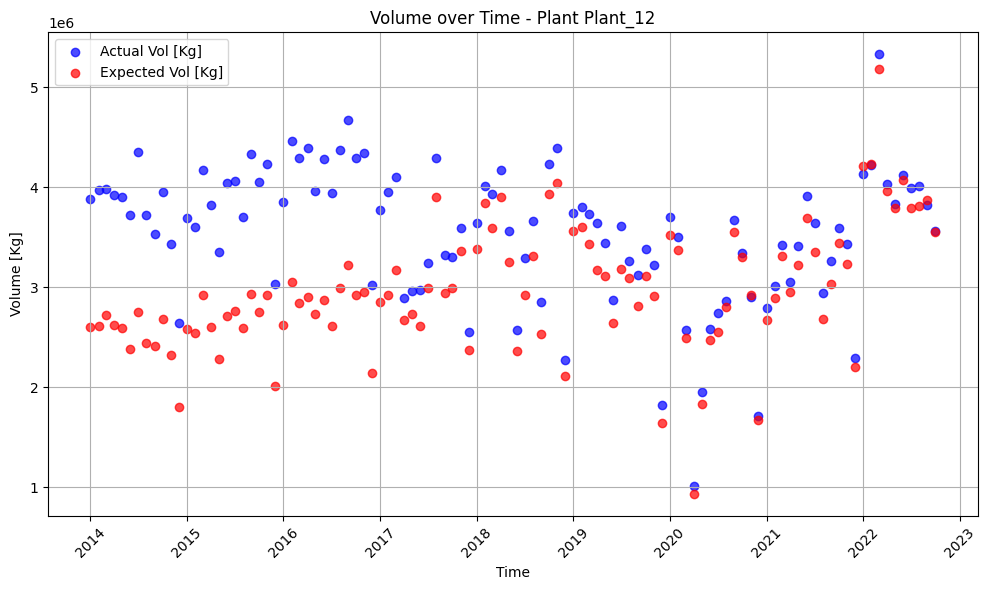

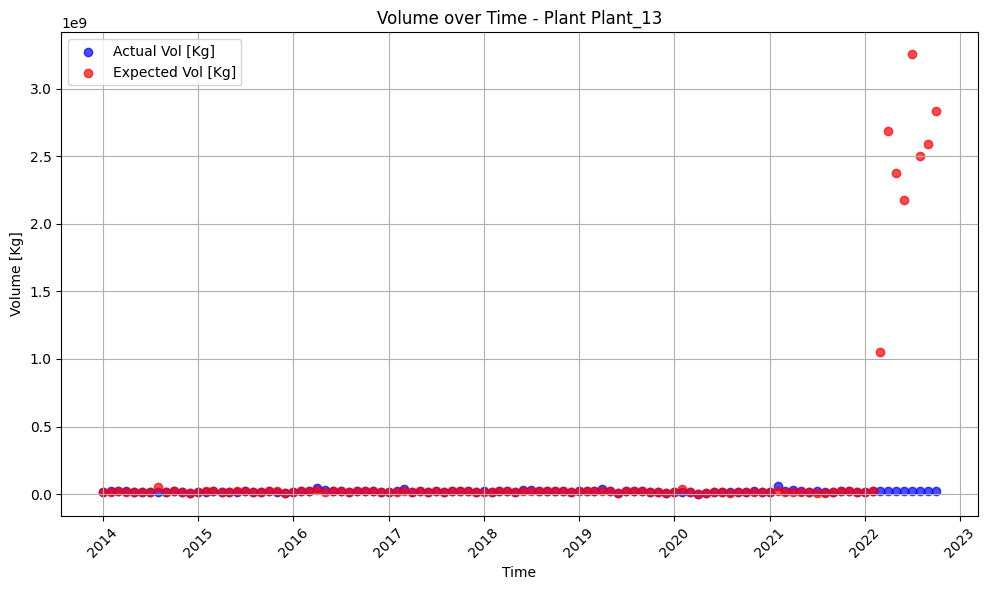

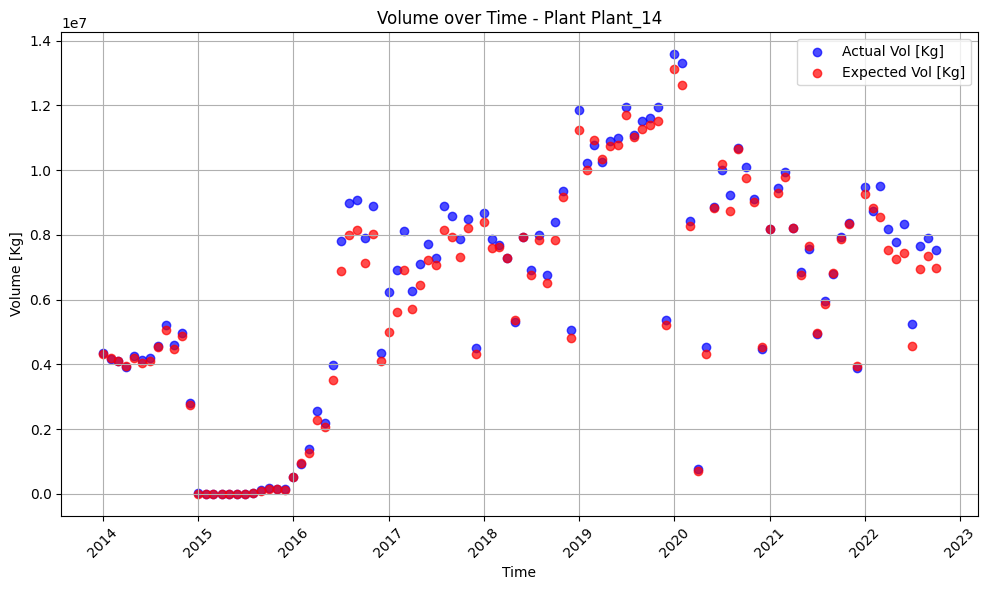

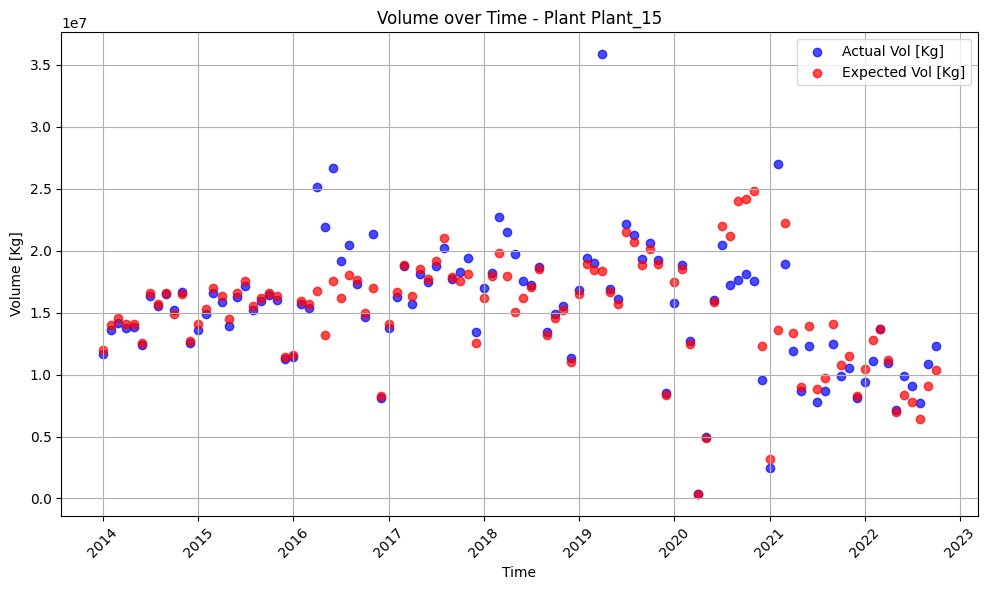

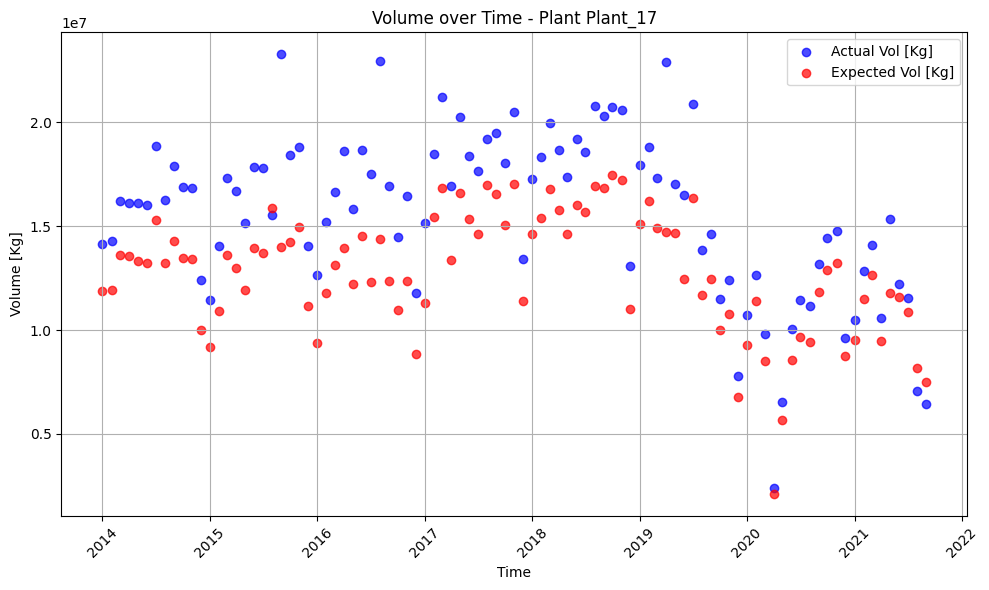

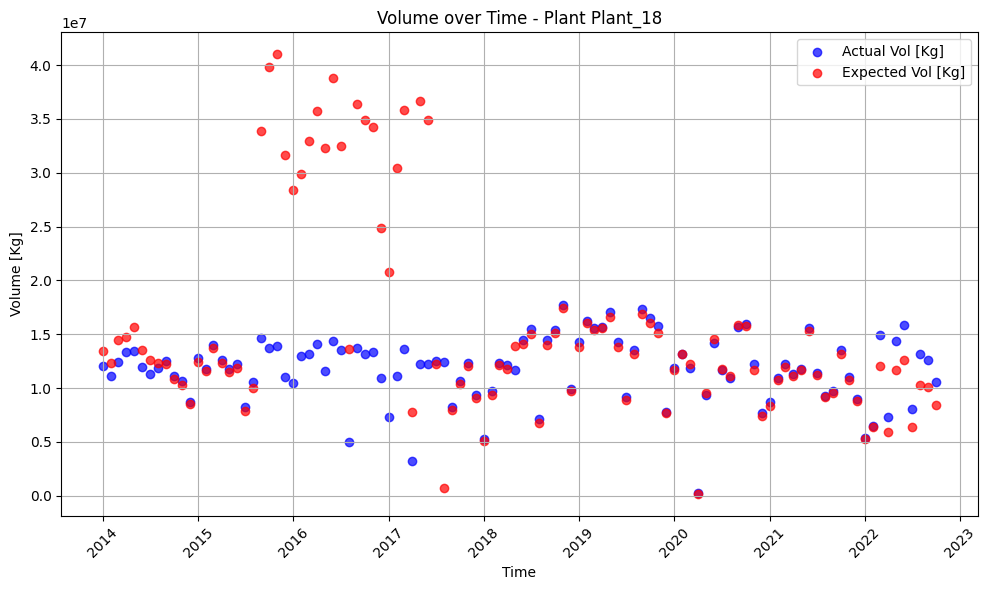

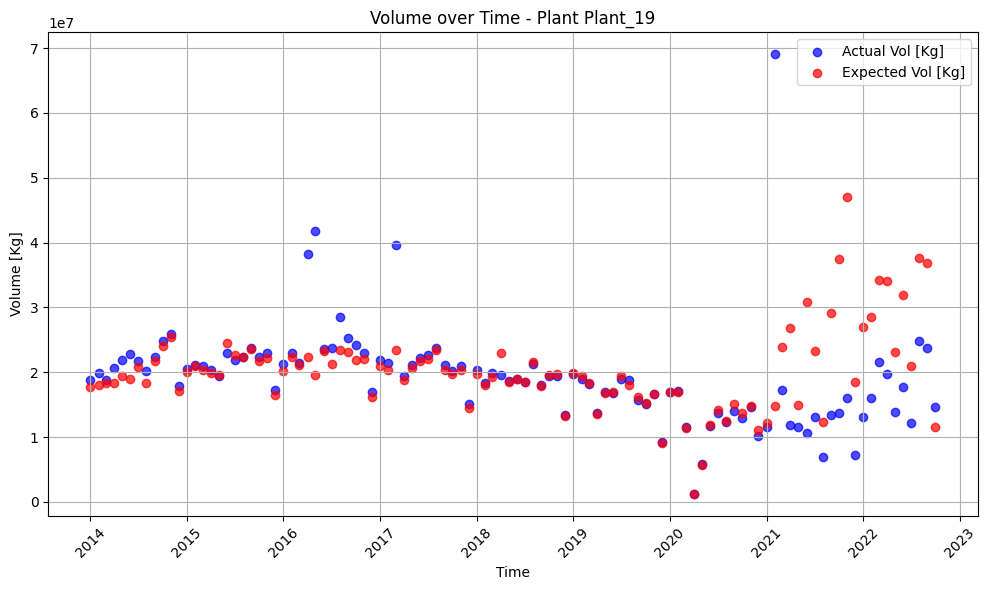

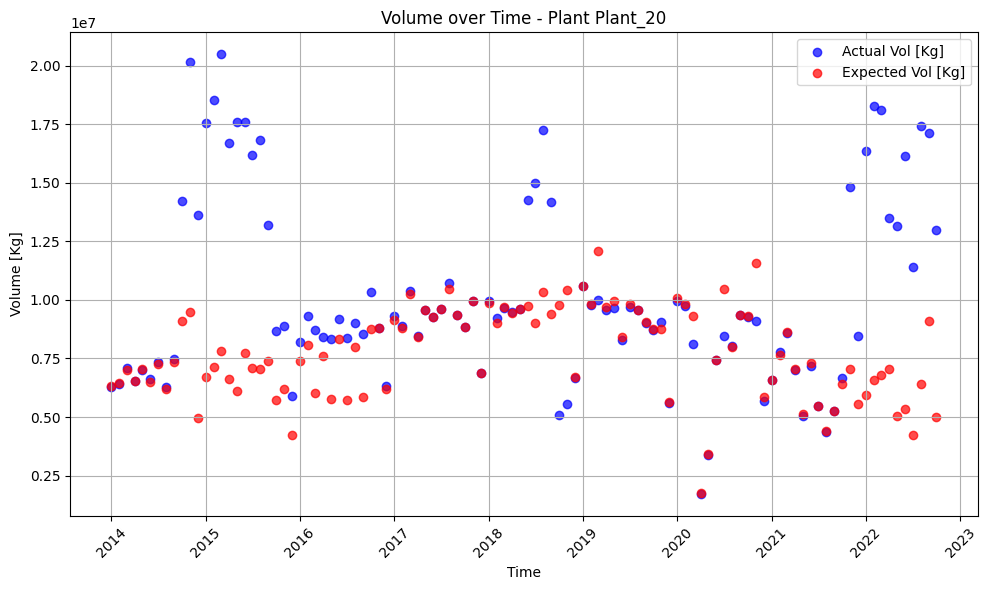

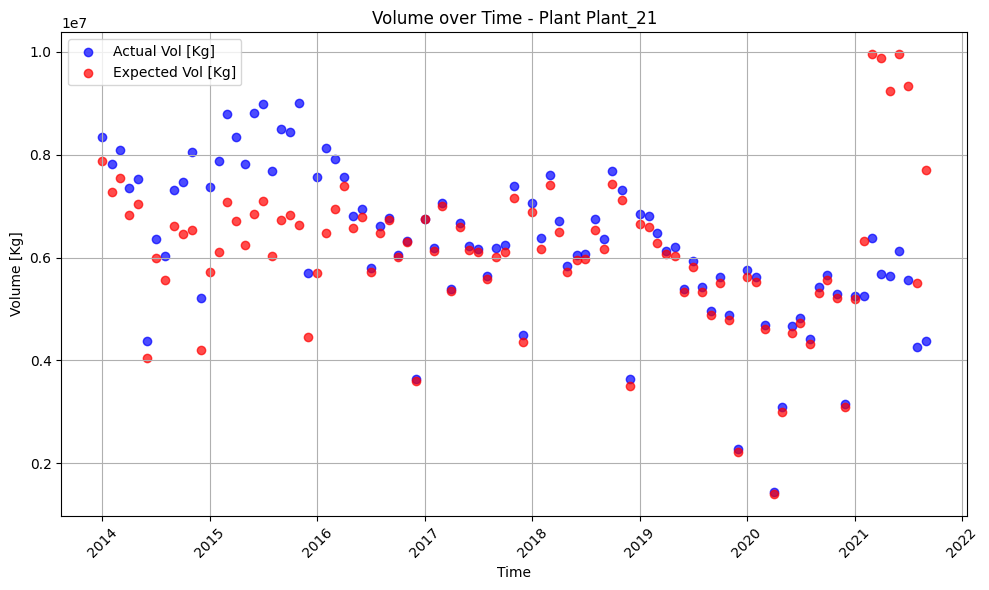

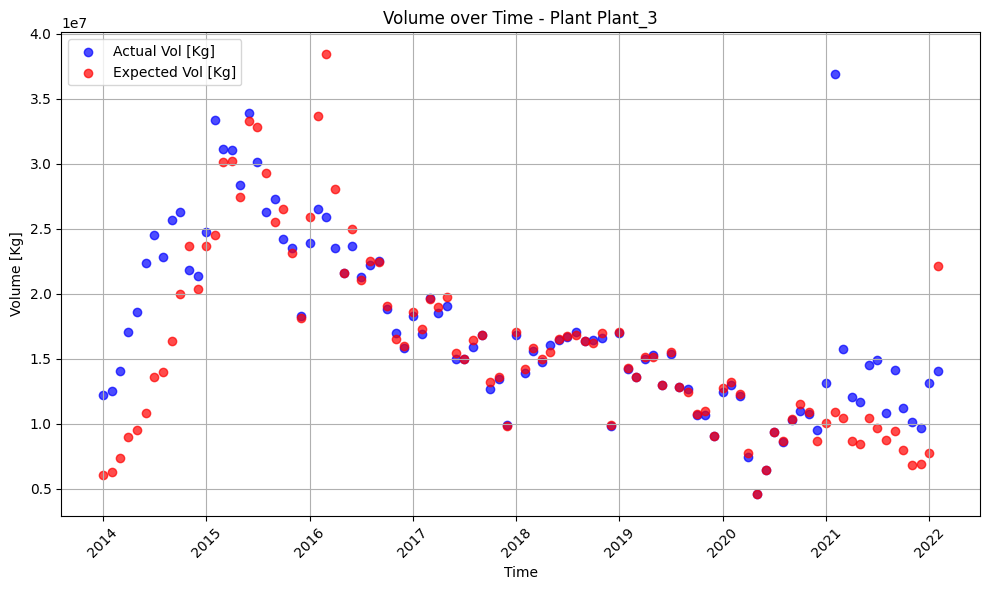

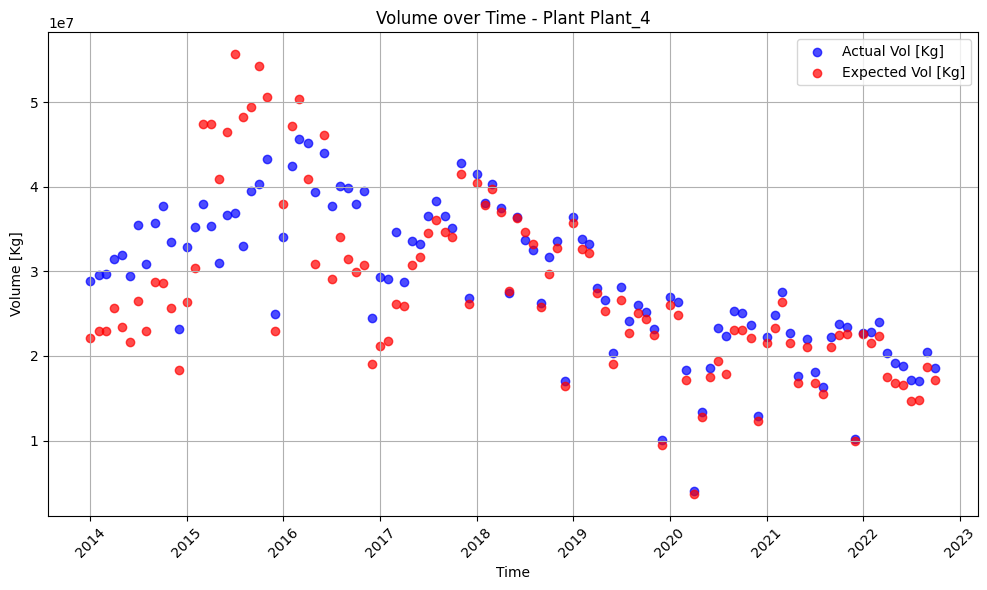

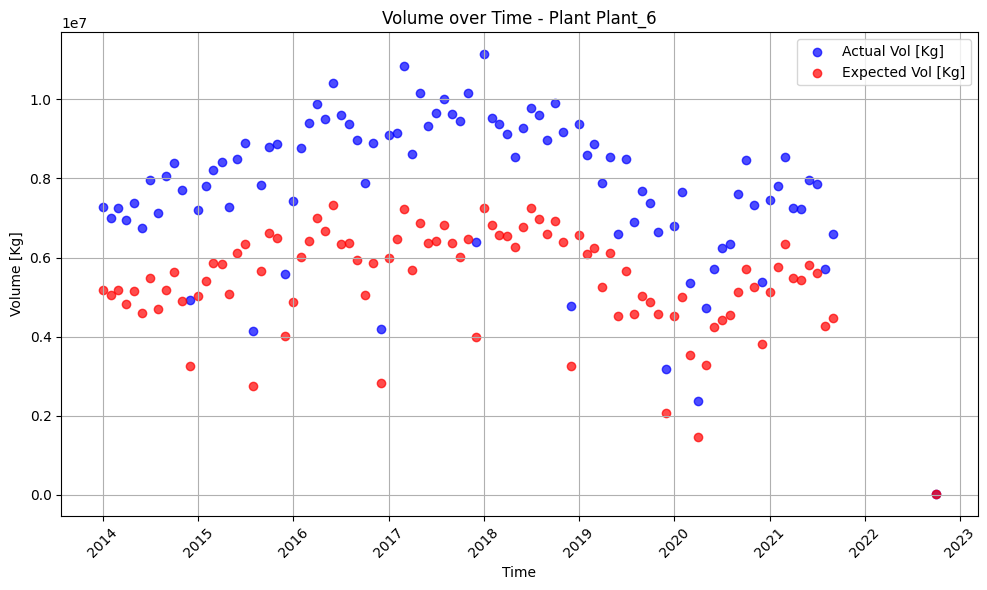

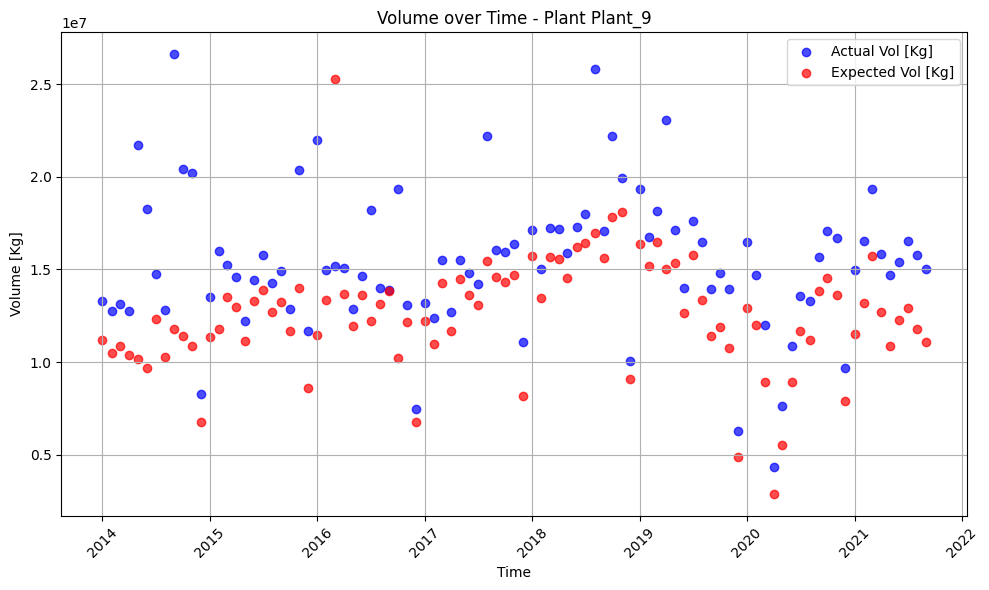

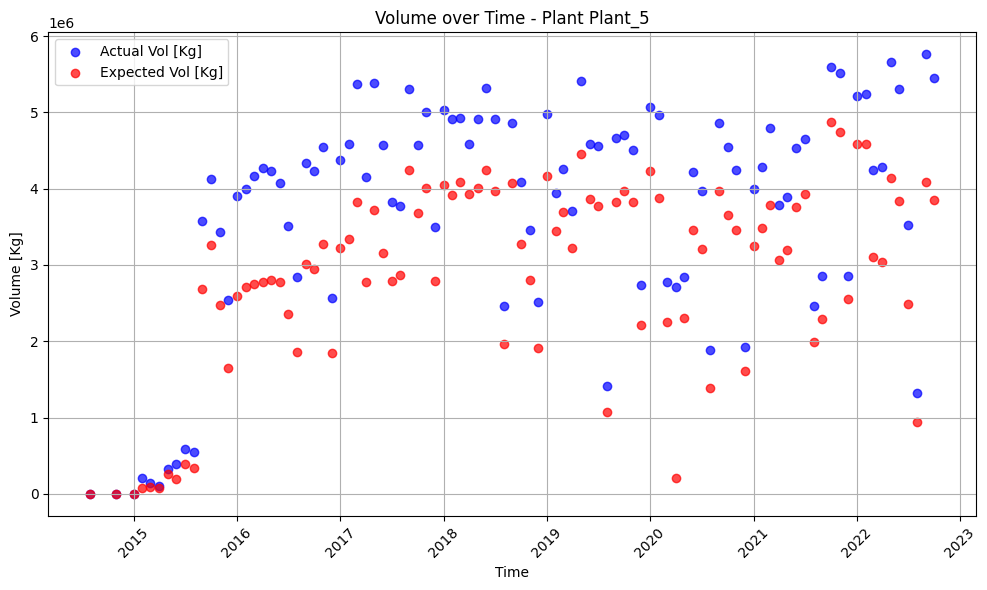

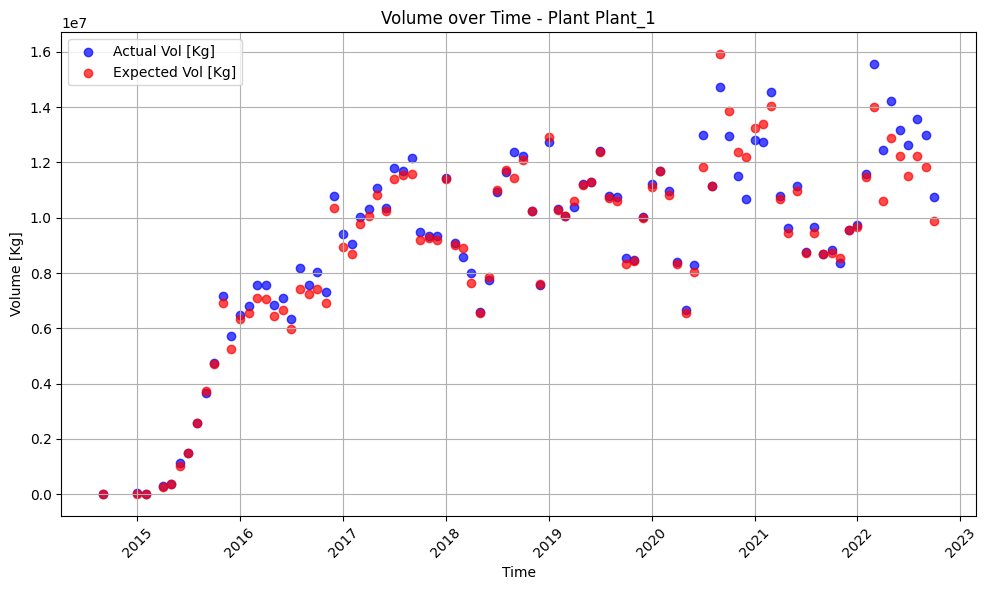

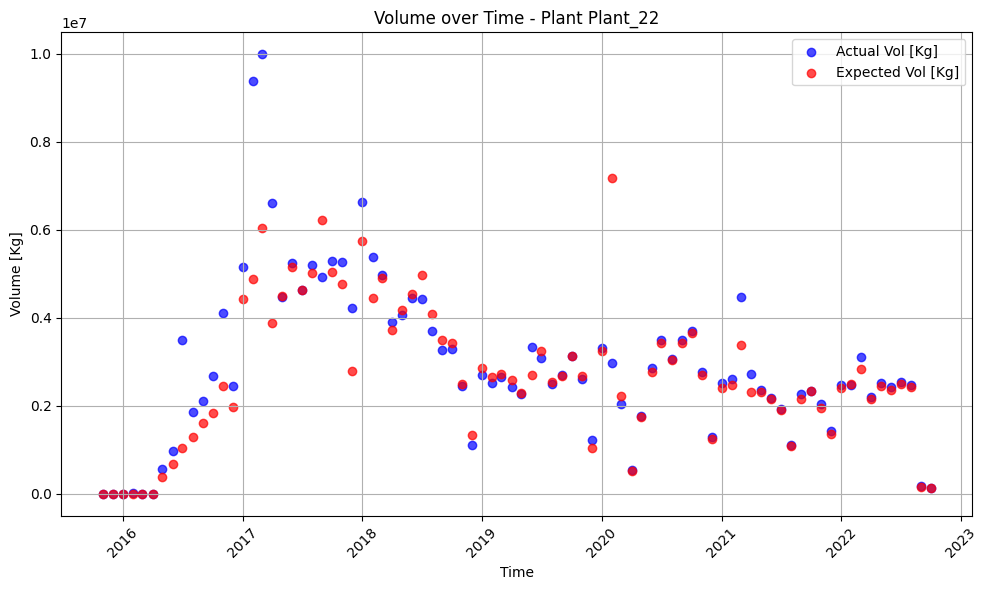

In [315]:
## PLOT: Actual Volume vs Expected Volume over Time (Per PLANT and in a set SETTIMEFRAME)

# Filter data for a specific timeframe (e.g., from 'start_date' to 'end_date')
start_date = '2014-01-01'
end_date = '2022-10-31'

# Get unique plant names from the DataFrame
unique_plants = produce_vs_received['Plant'].unique()

# Loop through each unique plant and create a separate plot for each
for plant in unique_plants:
    
    filtered_df = produce_vs_received[(produce_vs_received['Timestamp'] >= start_date) & (produce_vs_received['Timestamp'] <= end_date) &(produce_vs_received['Plant'] == plant)]

    # Plotting the filtered data
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_df['Timestamp'], filtered_df['Actual Vol [Kg]'], label='Actual Vol [Kg]', color='blue', alpha=0.7)
    plt.scatter(filtered_df['Timestamp'], filtered_df['Expected Vol [Kg]'], label='Expected Vol [Kg]', color='red', alpha=0.7)

    # Set labels and title
    plt.xlabel('Time')
    plt.ylabel('Volume [Kg]')
    plt.title(f'Volume over Time - Plant {plant}')

    # Rotate x-axis labels for better readability (if needed)
    plt.xticks(rotation=45)

    # Show legend
    plt.legend()

    # Show grid
    plt.grid(True)

    # Display the plot
    plt.tight_layout()
    plt.show()


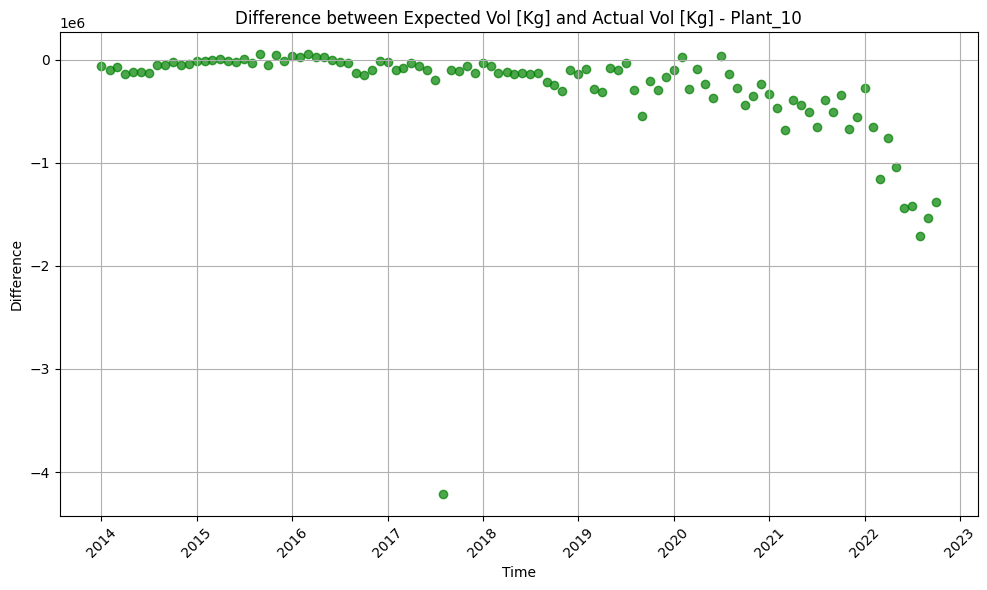

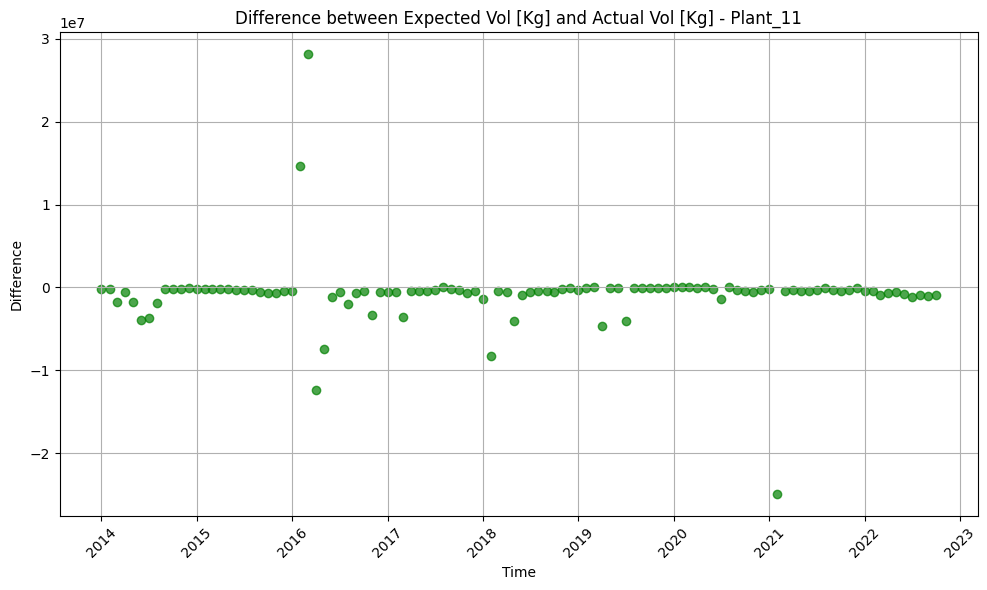

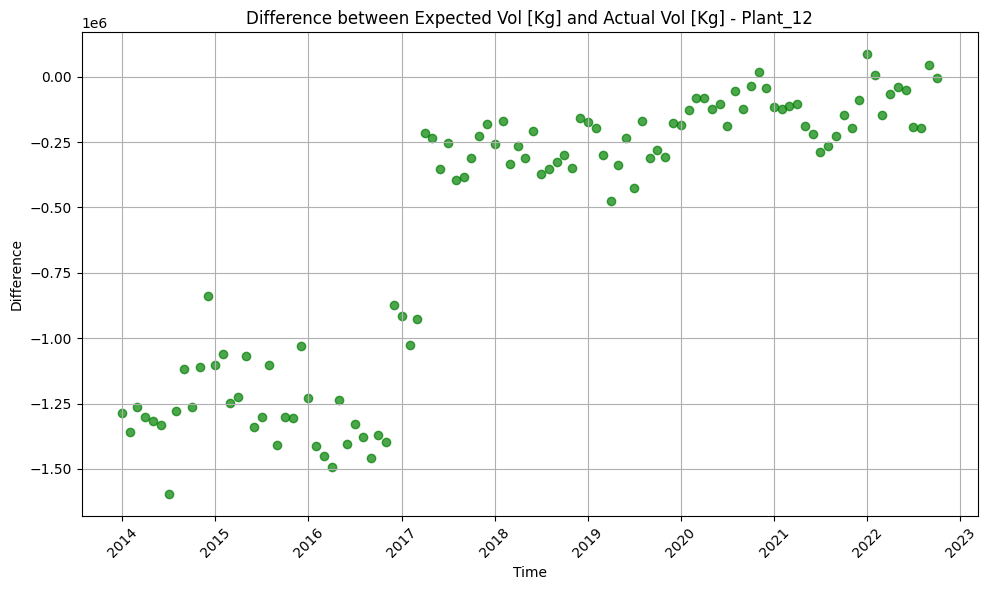

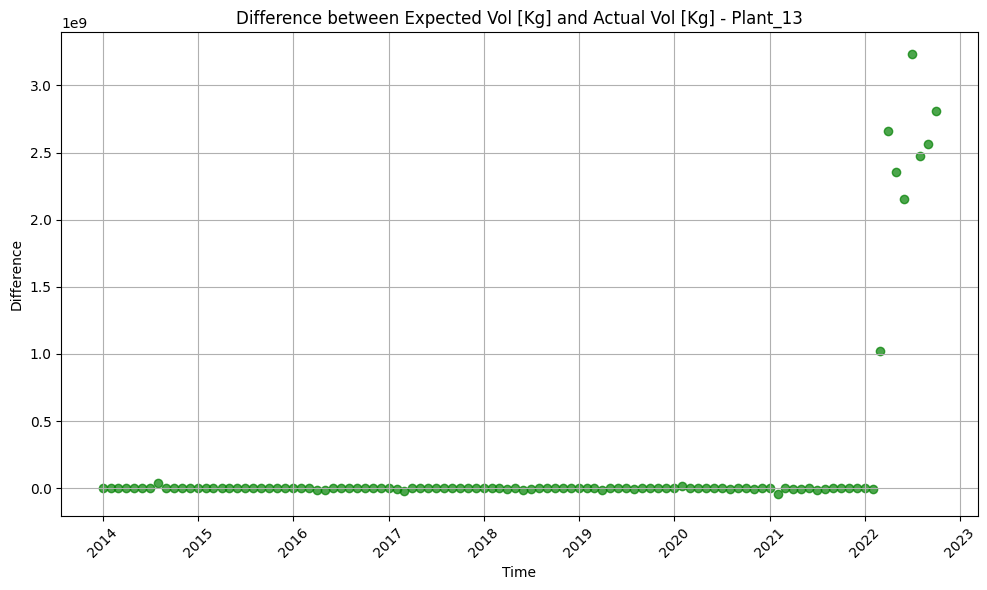

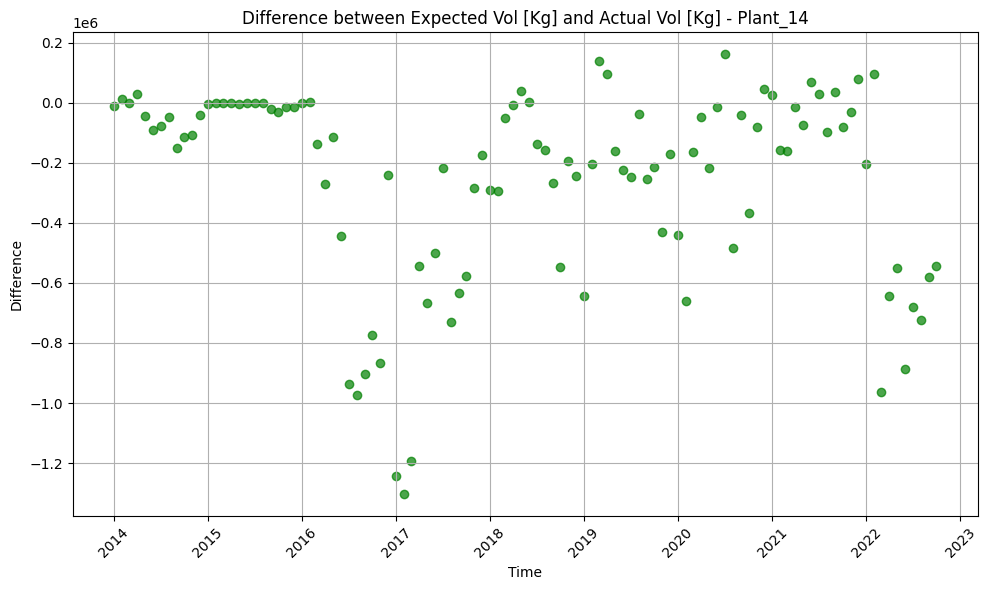

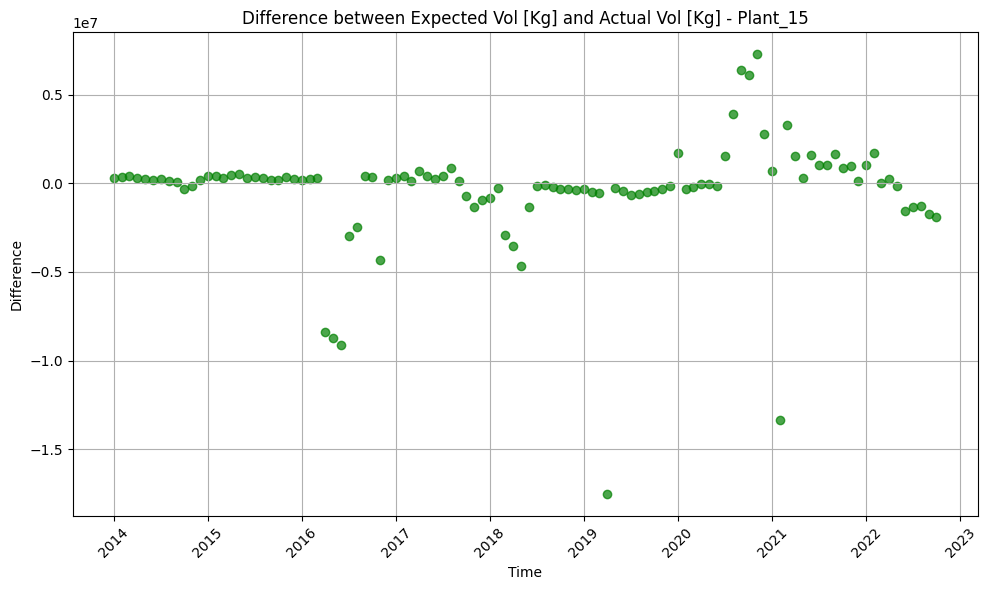

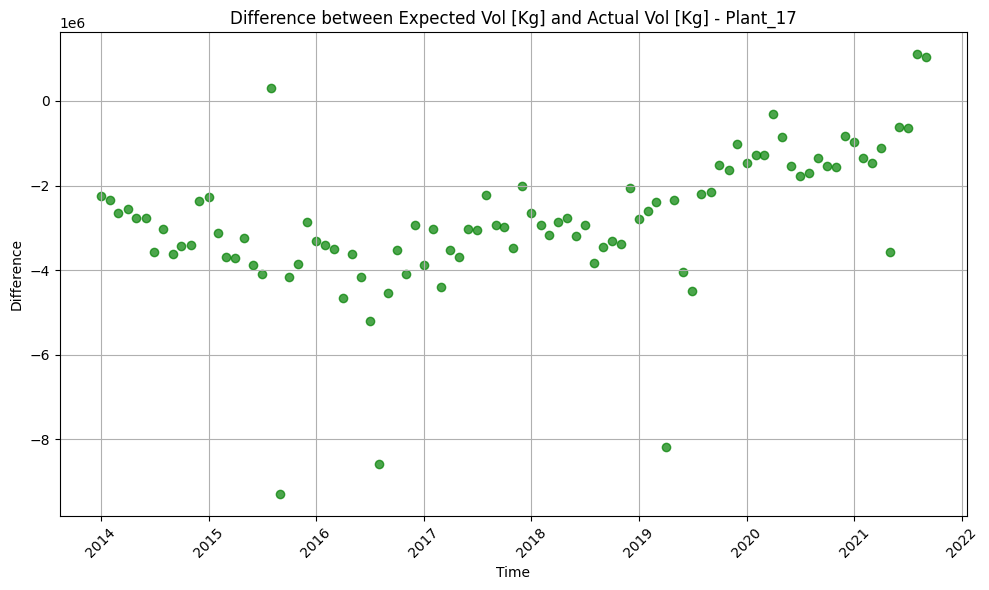

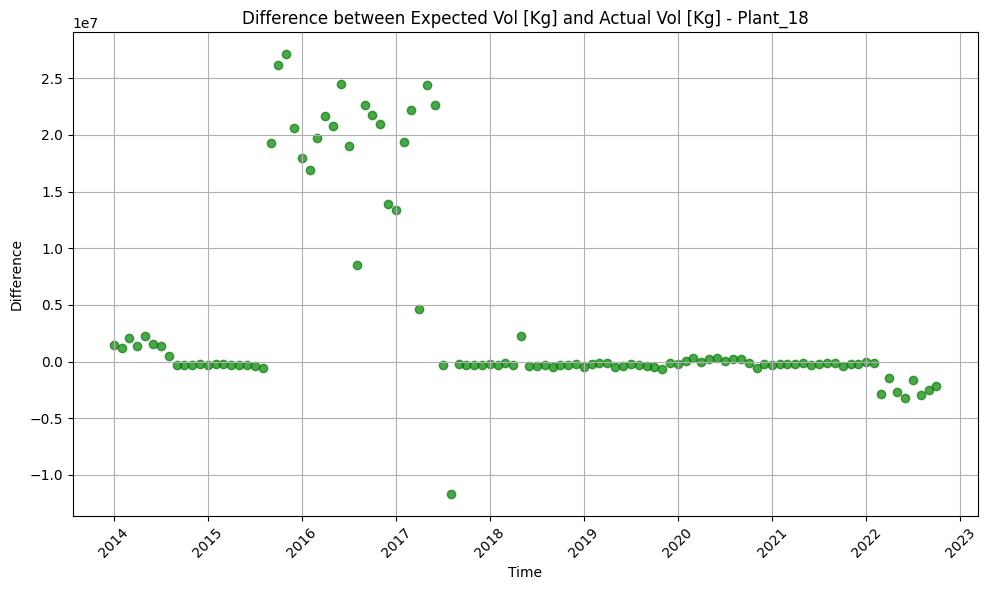

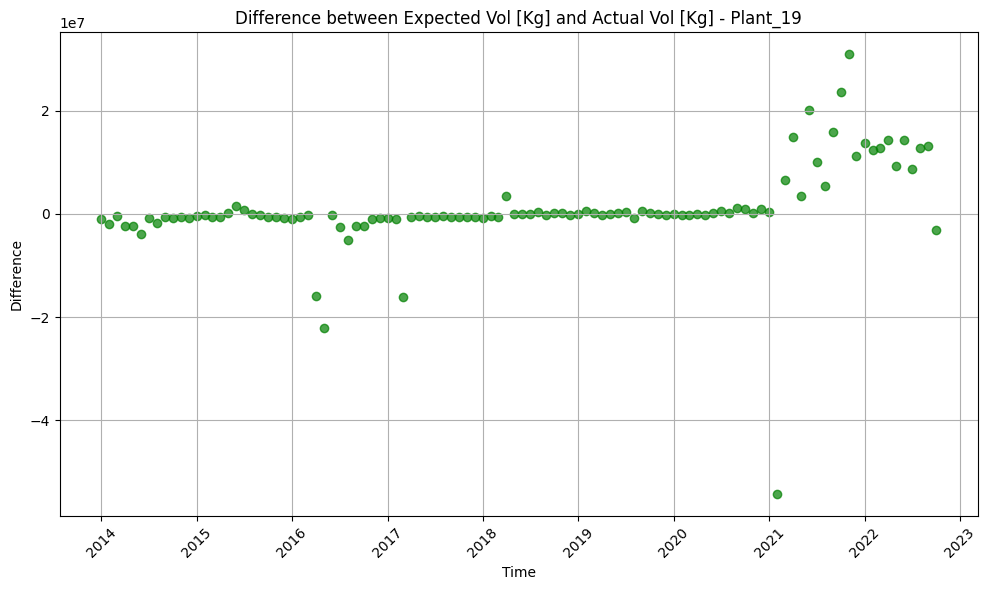

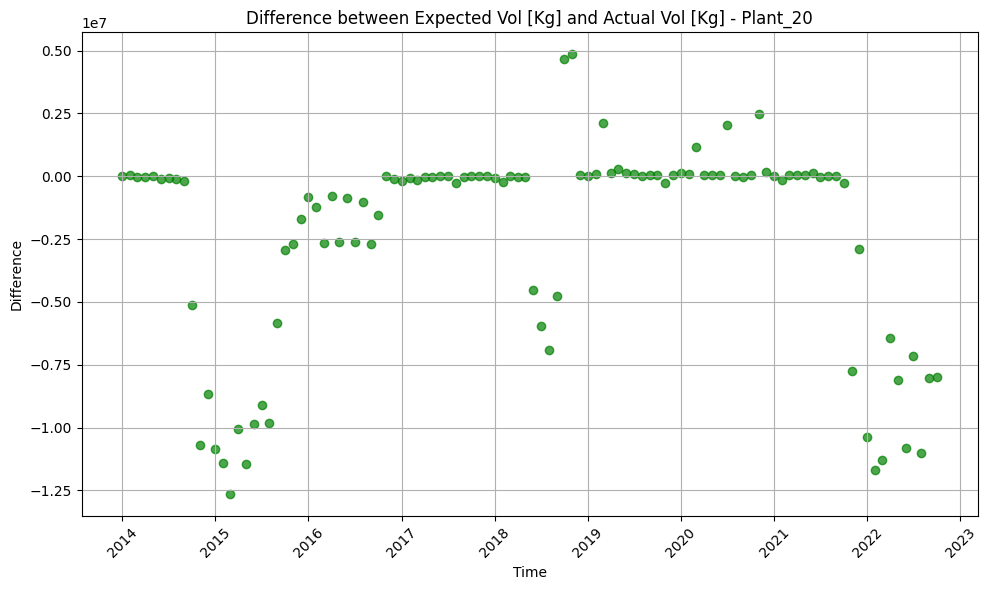

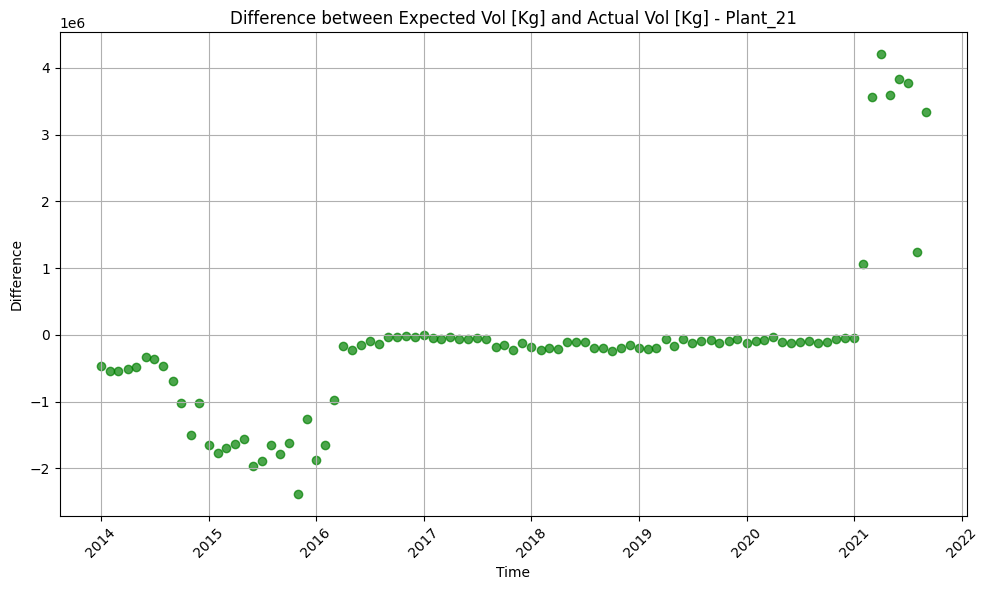

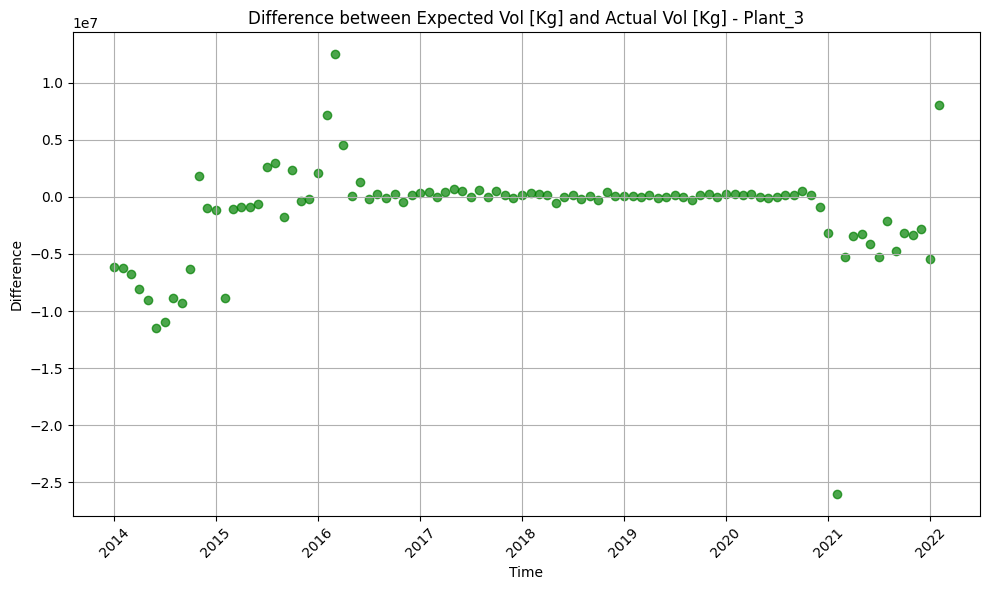

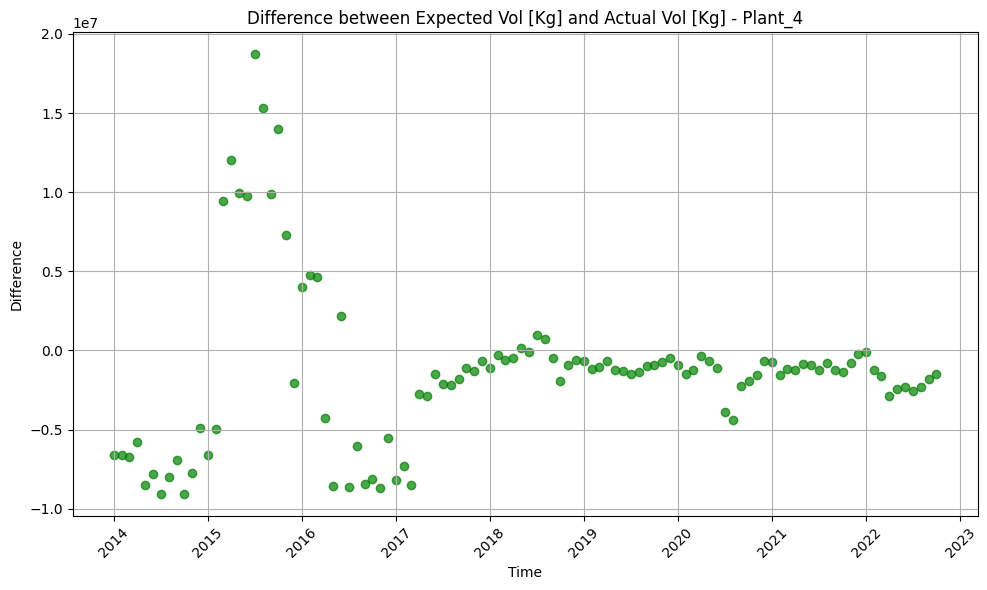

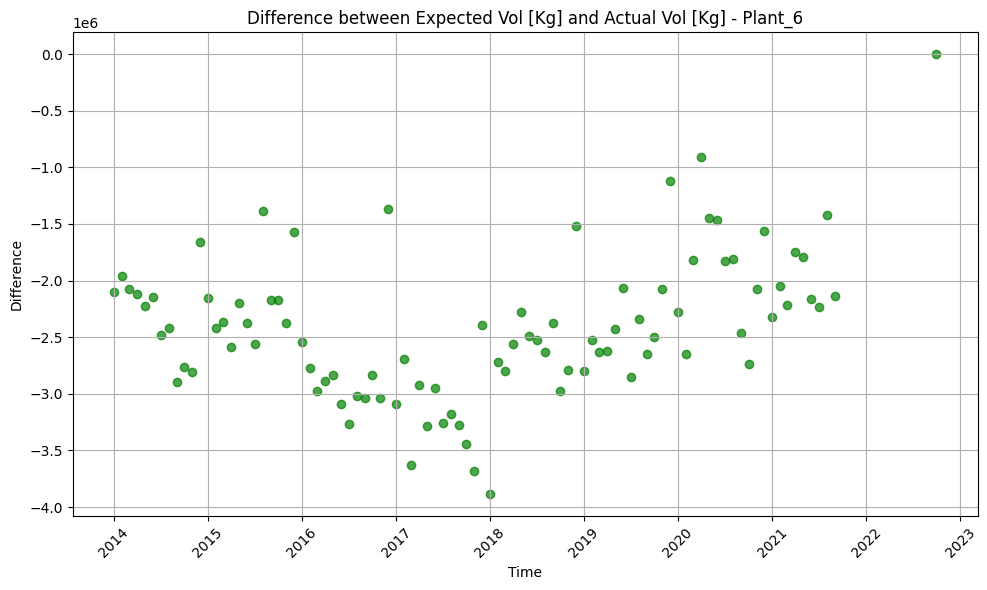

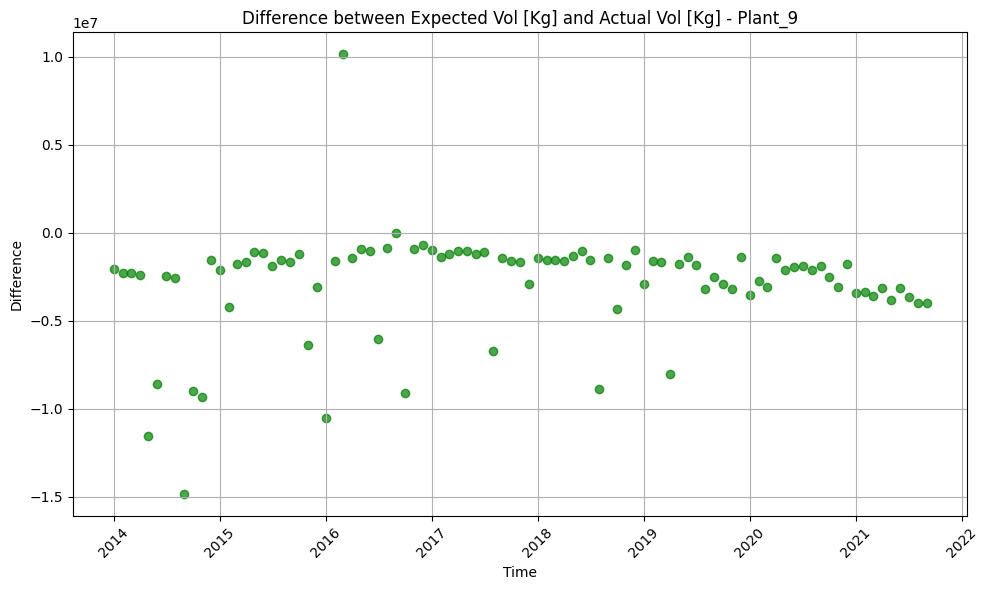

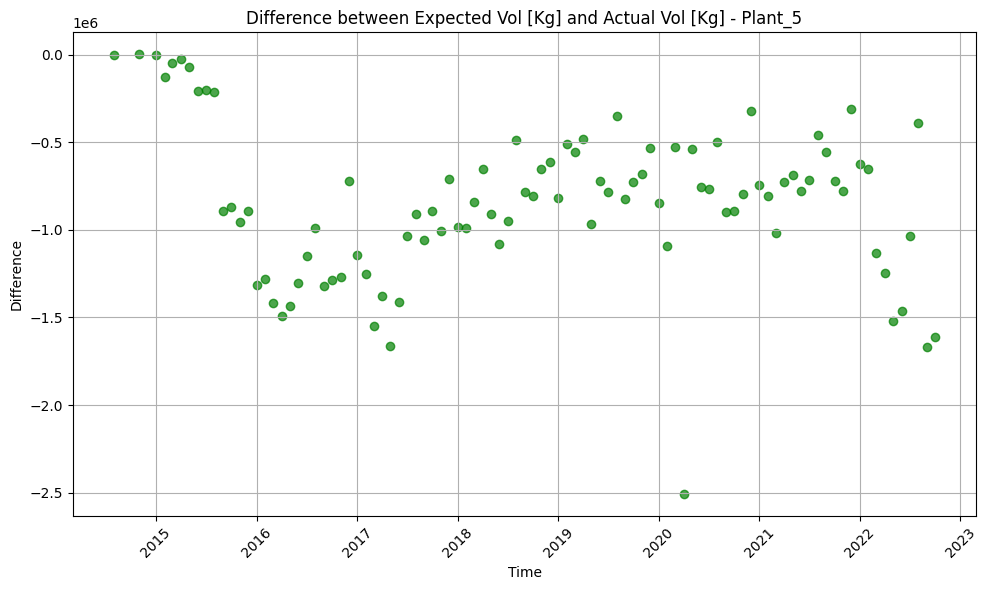

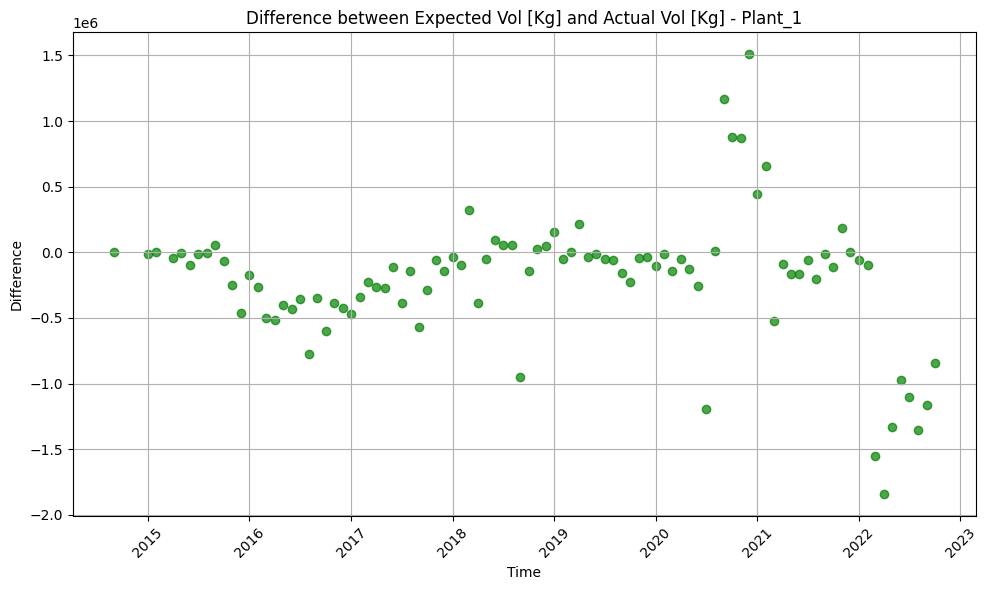

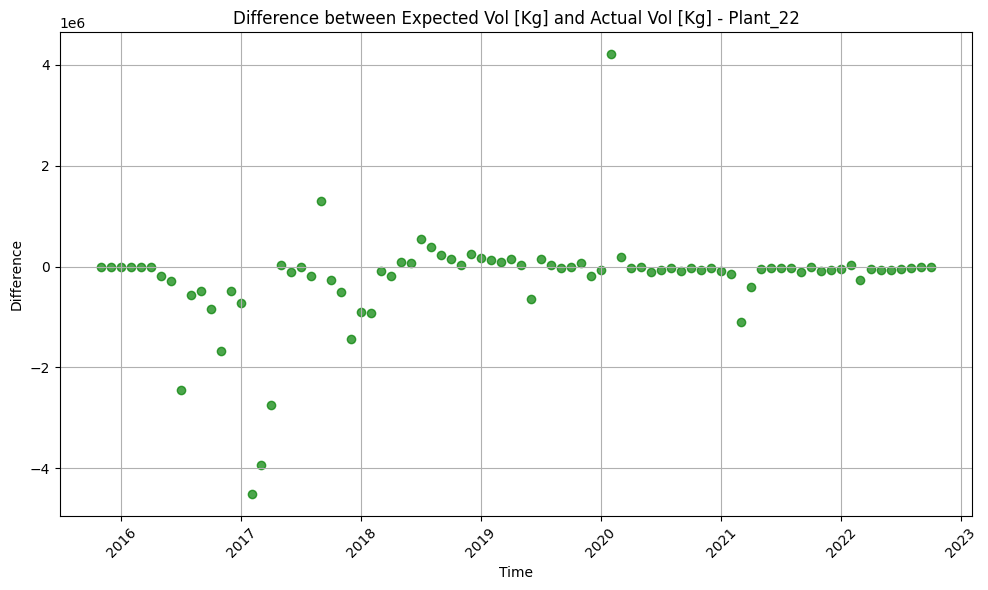

In [316]:
## PLOT: Difference between 'Expected Vol [Kg]' and 'Actual Vol [Kg]' (Per PLANT and in a set SETTIMEFRAME)

# Filter data for a specific timeframe (e.g., from 'start_date' to 'end_date')
start_date = '2014-01-01'
end_date = '2022-10-31'

# Get unique plant names from the DataFrame
unique_plants = produce_vs_received['Plant'].unique()

# Loop through each unique plant and create a separate plot for each
for plant in unique_plants:
    
    filtered_df = produce_vs_received[(produce_vs_received['Timestamp'] >= start_date) & (produce_vs_received['Timestamp'] <= end_date) &(produce_vs_received['Plant'] == plant)]

    # Plotting the filtered data
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_df['Timestamp'], filtered_df['Difference'], label='Difference', color='green', alpha=0.7)
    
    # Set labels and title
    plt.xlabel('Time')
    plt.ylabel('Difference')
    plt.title(f'Difference between Expected Vol [Kg] and Actual Vol [Kg] - {plant}')

    # Rotate x-axis labels for better readability (if needed)
    plt.xticks(rotation=45)

    # Show grid
    plt.grid(True)

    # Display the plot
    plt.tight_layout()
    plt.show()

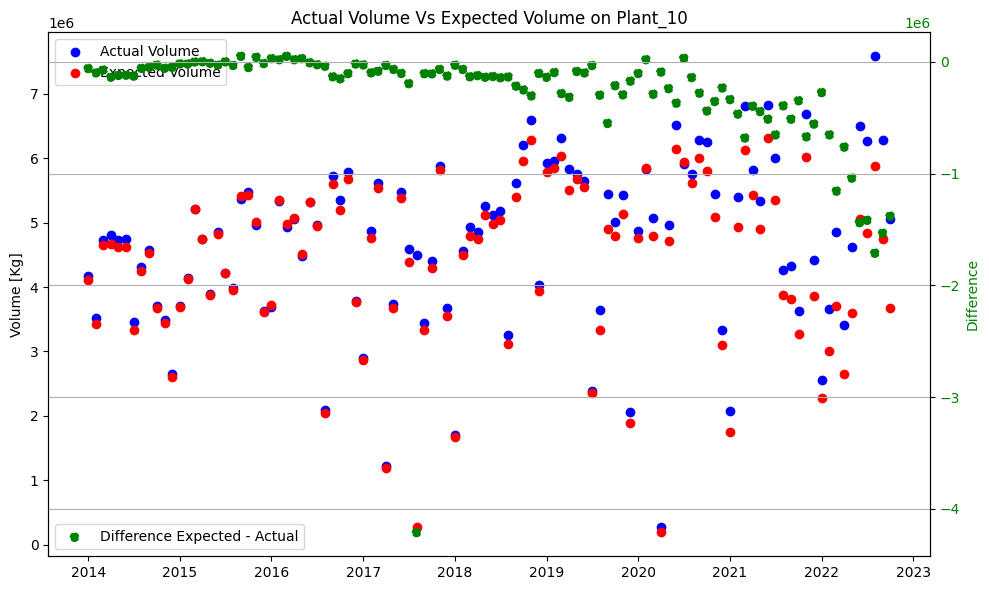

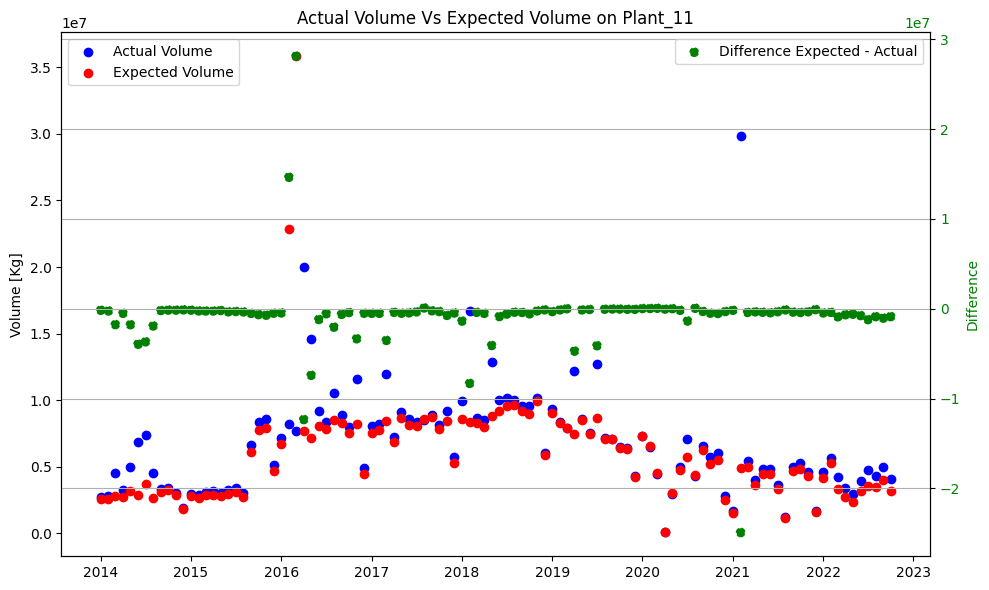

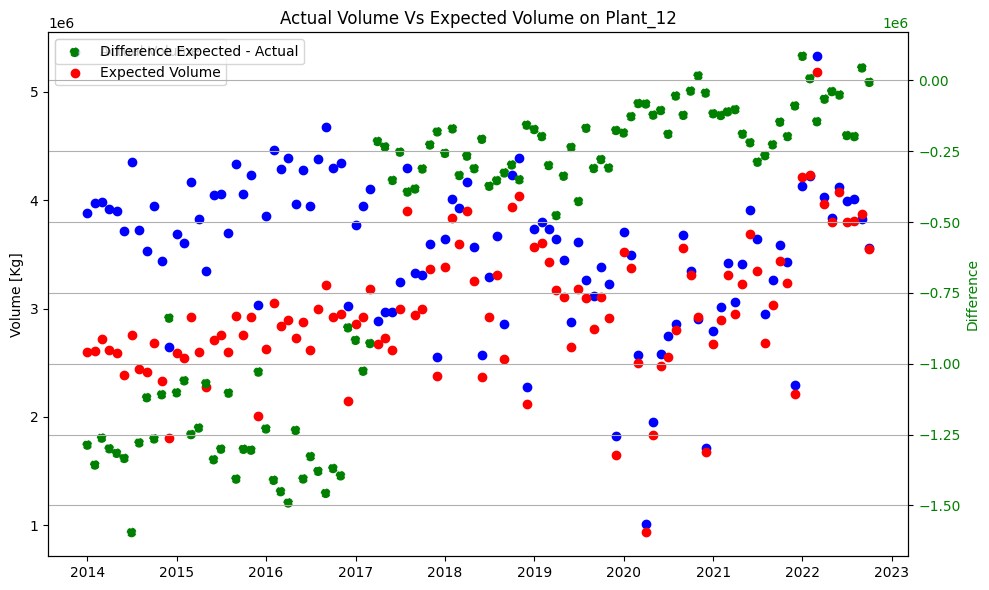

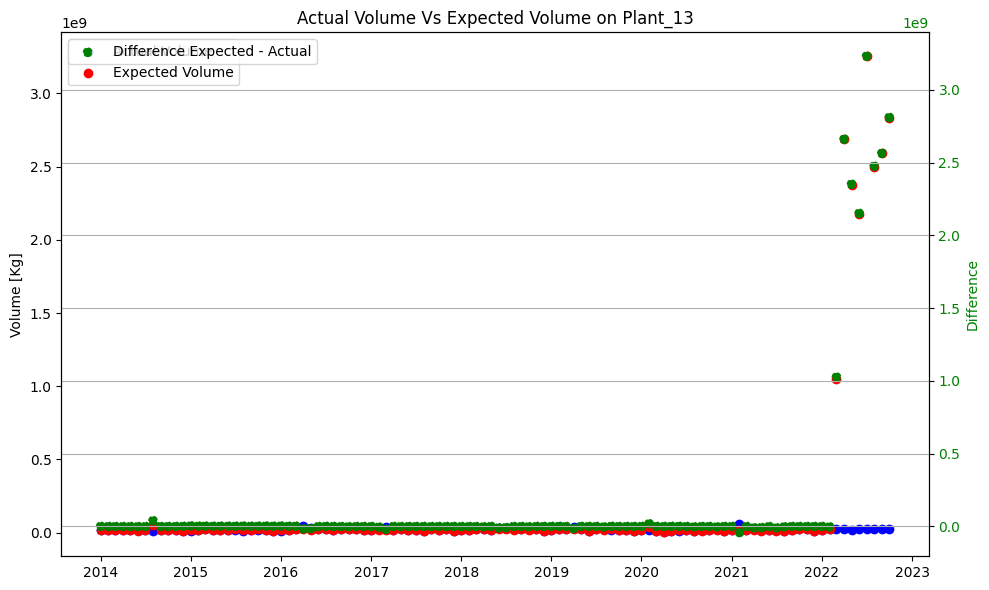

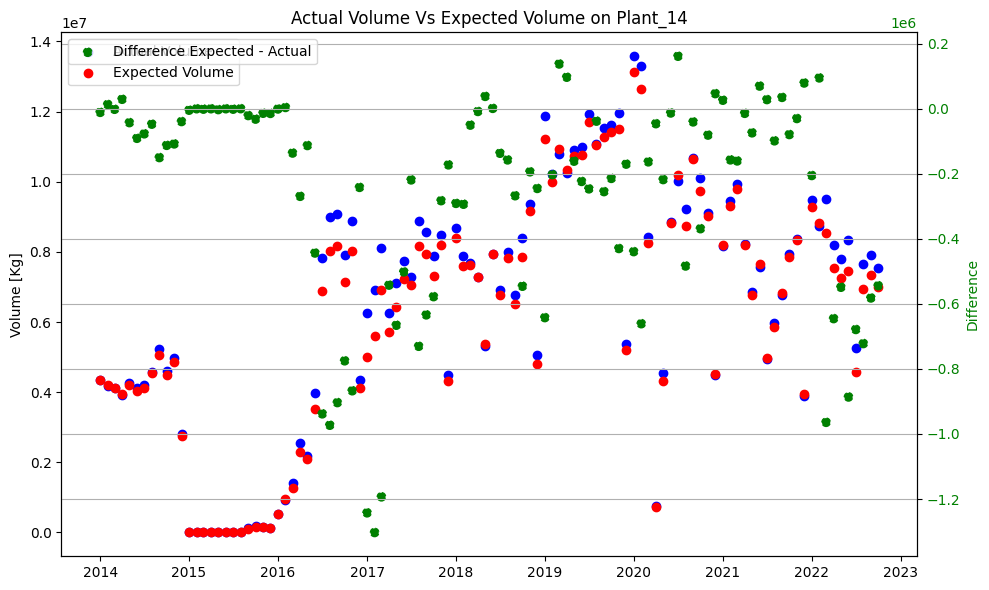

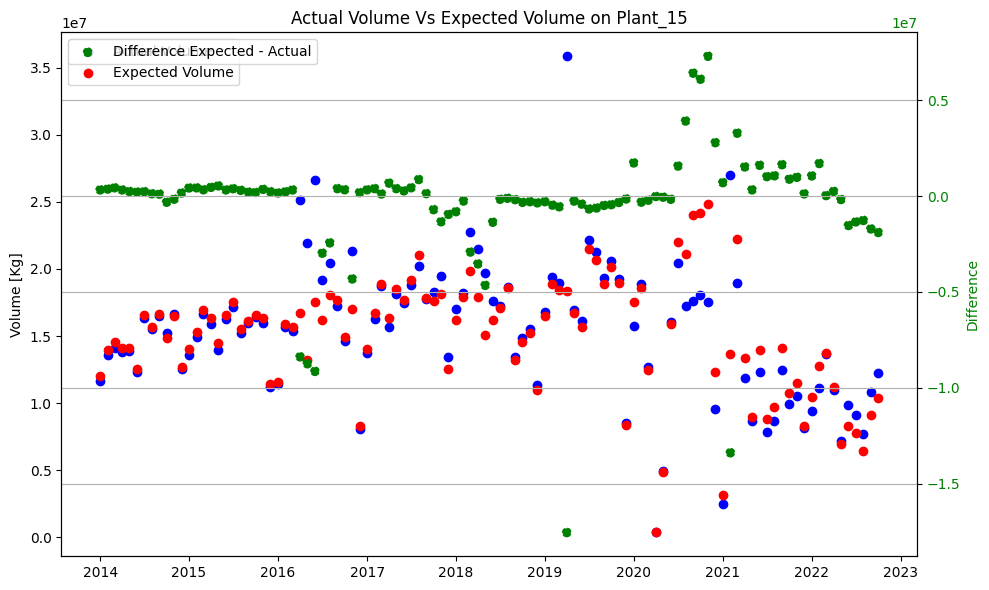

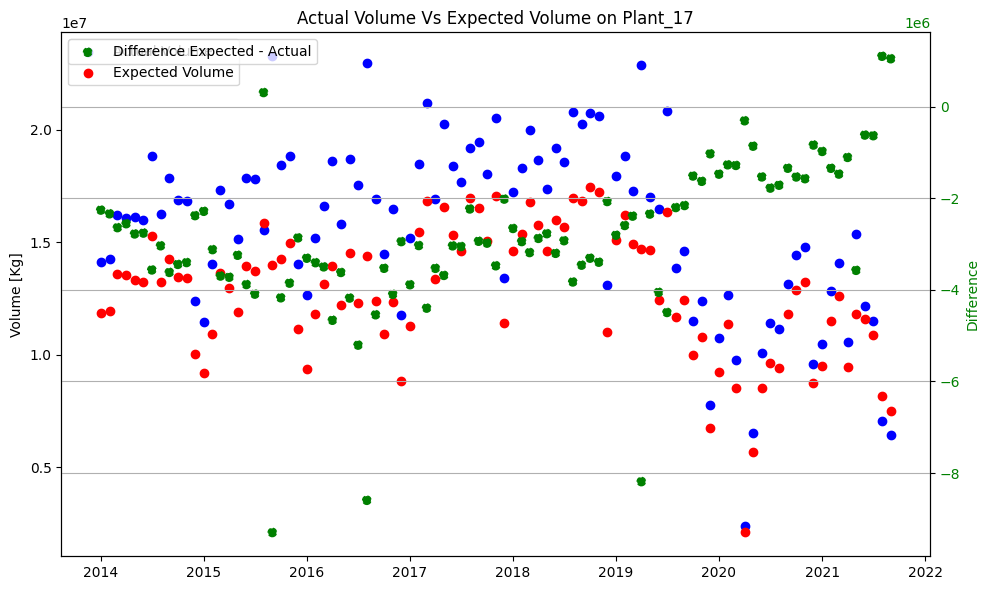

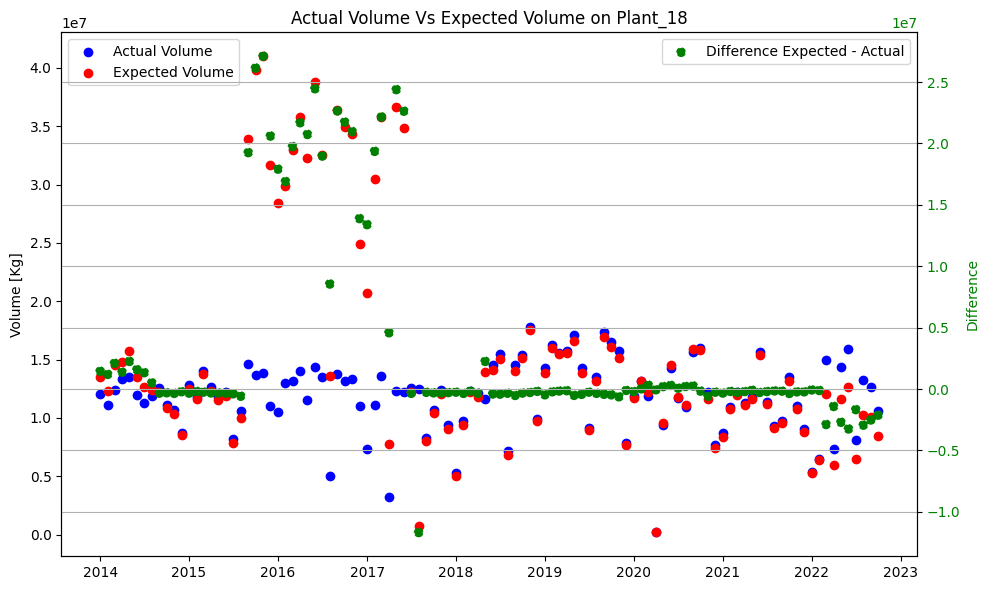

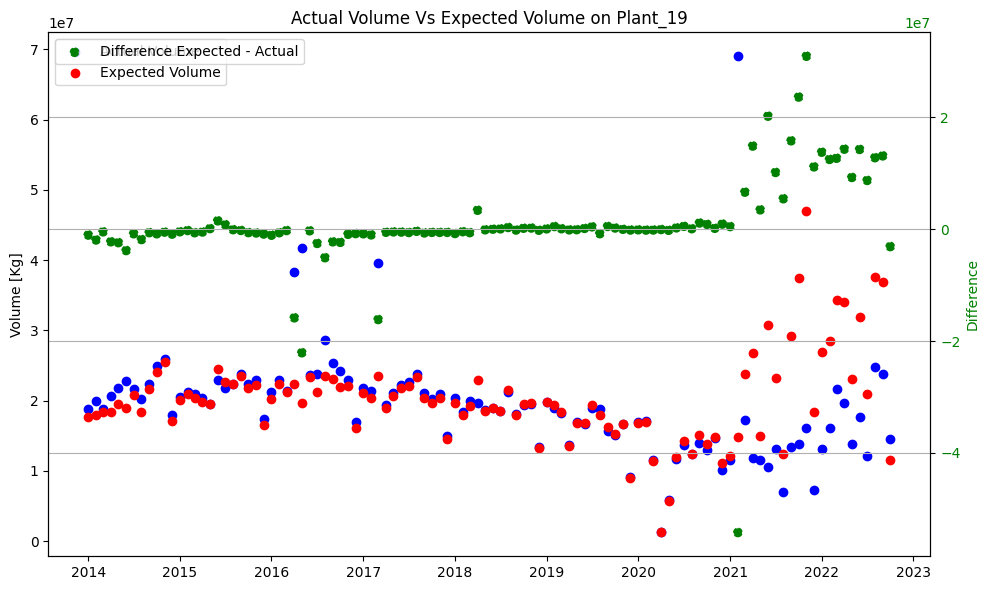

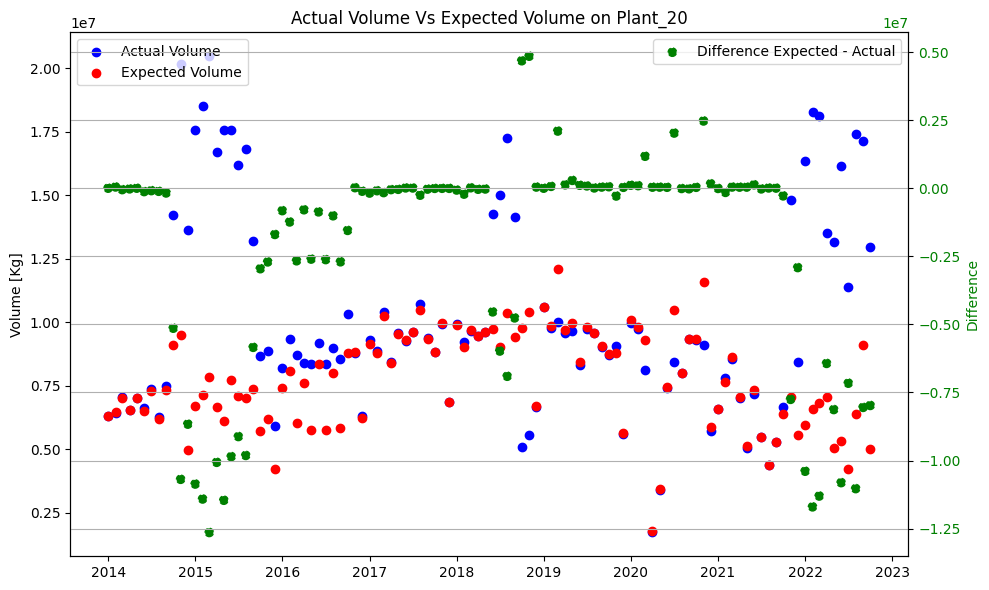

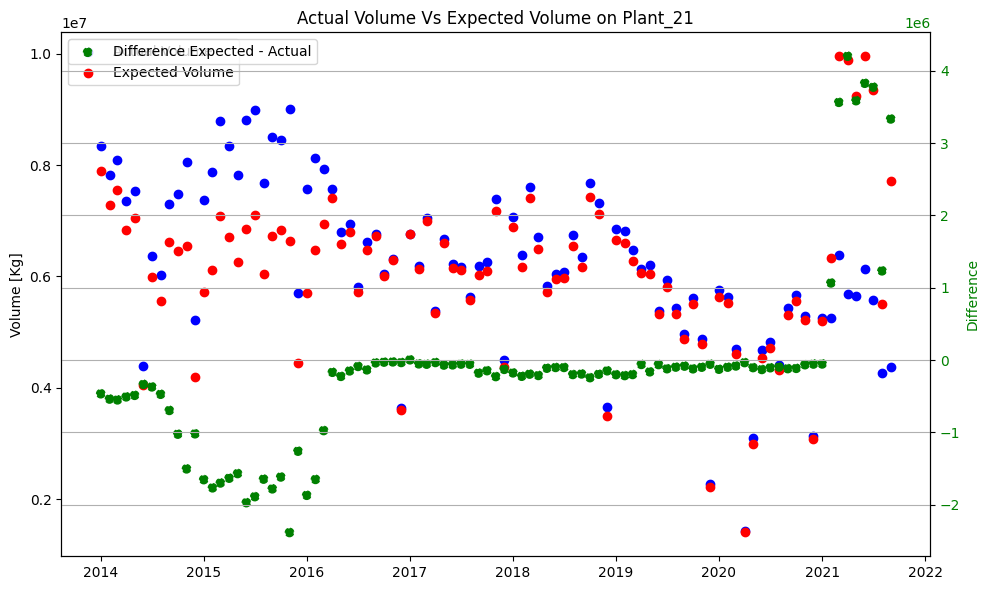

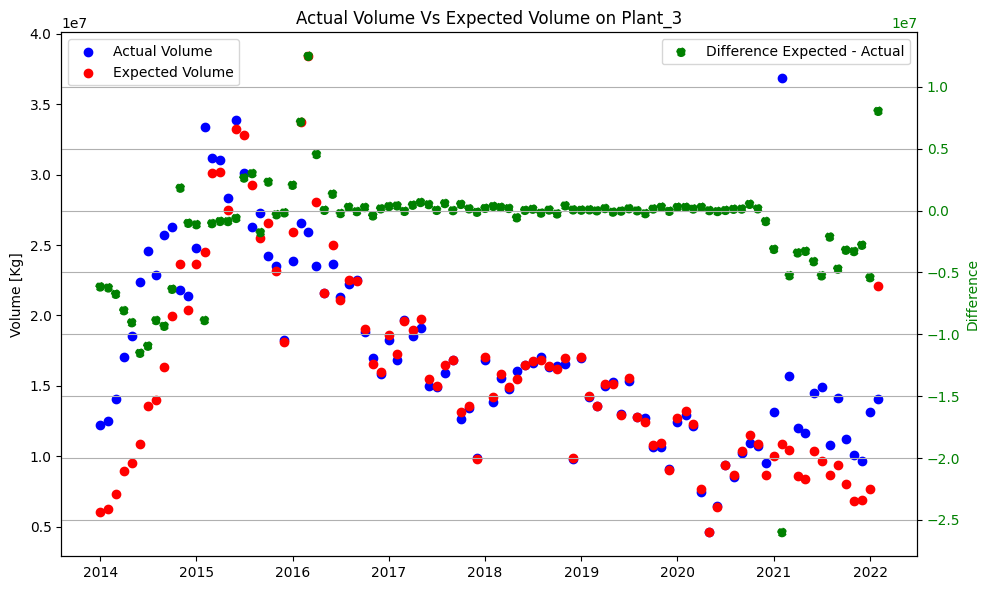

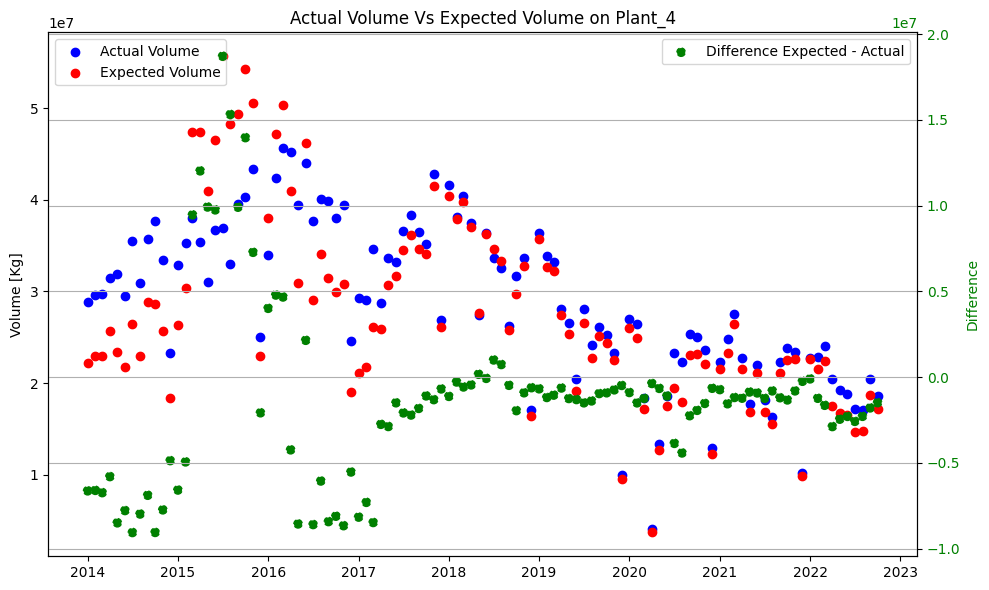

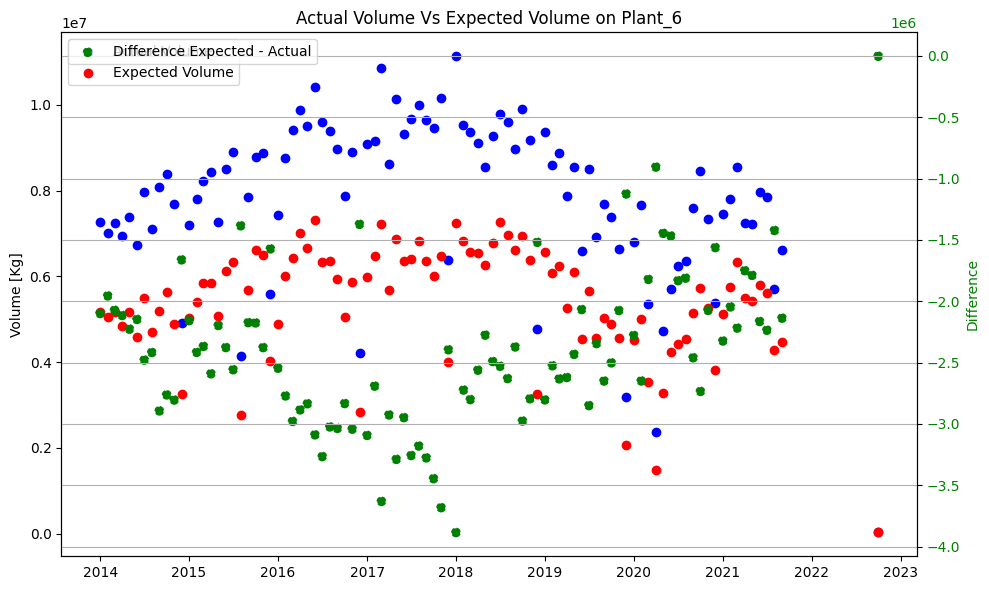

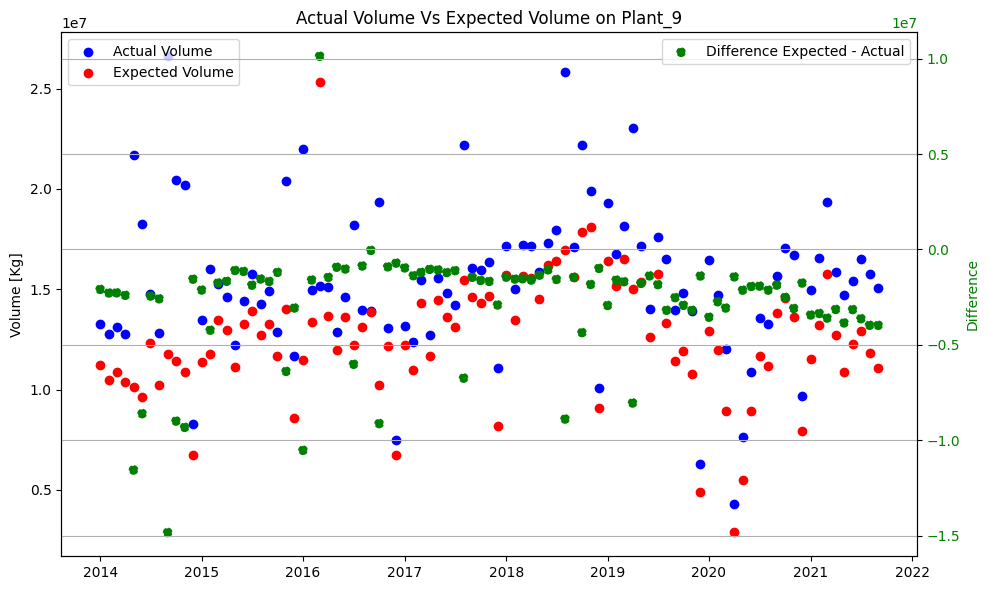

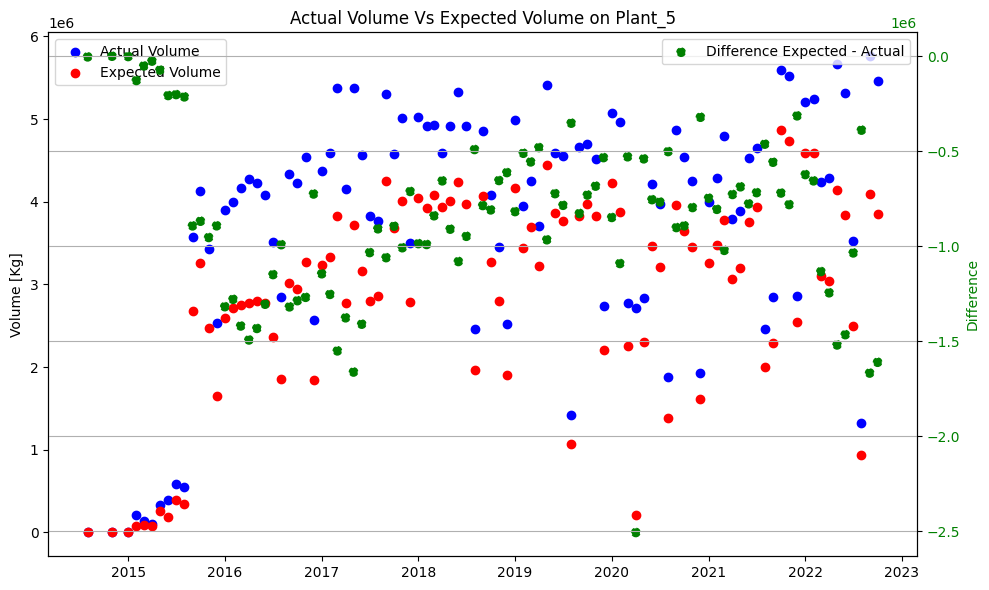

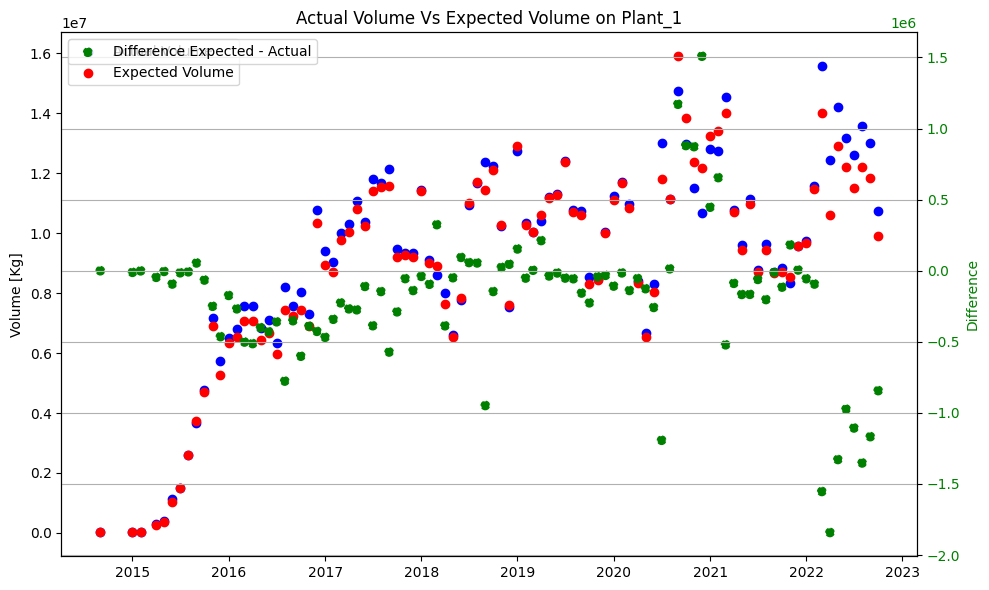

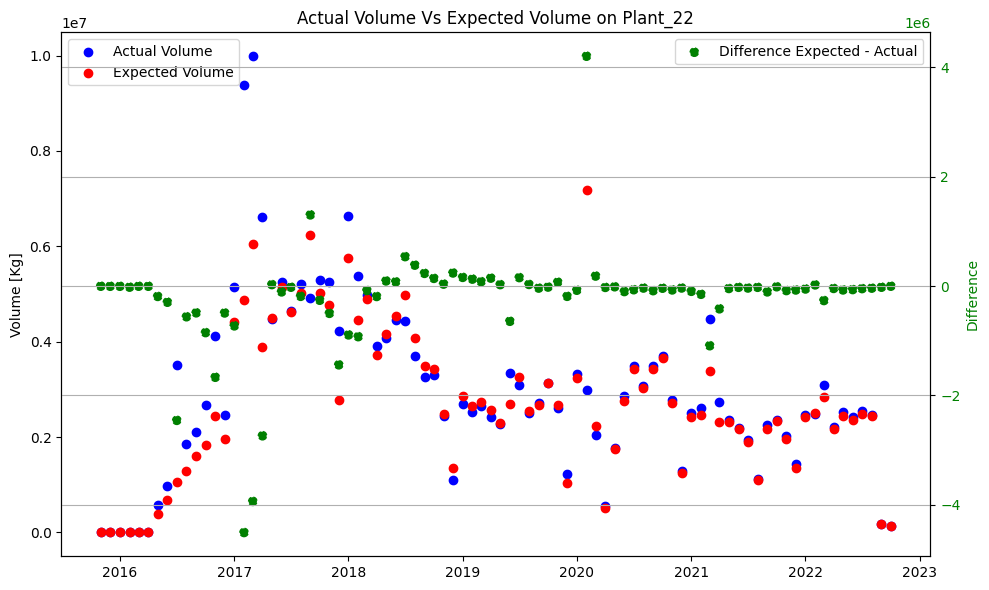

In [ ]:
## PLOT: Difference between 'Expected Vol [Kg]' and 'Actual Vol [Kg]' (Per PLANT and in a set SETTIMEFRAME)

# Filter data for a specific timeframe (e.g., from 'start_date' to 'end_date')
start_date = '2014-01-01'
end_date = '2022-10-31'

# Get unique plant names from the DataFrame
unique_plants = produce_vs_received['Plant'].unique()

# Loop through each unique plant and create a separate plot for each
for plant in unique_plants:
    #filter by timeframe and plant
    filtered_df = produce_vs_received[(produce_vs_received['Timestamp'] >= start_date) & (produce_vs_received['Timestamp'] <= end_date) &(produce_vs_received['Plant'] == plant)]

    # Plotting the filtered data
    plt.figure(figsize=(10, 6))

     # Create the first plot for 'Actual Vol [Kg]' vs 'Timestamp' per plant on the left y-axis
    ax1 = plt.gca()
    ax1.scatter(filtered_df['Timestamp'], filtered_df['Actual Vol [Kg]'], label=f"Actual Volume", color='blue')
    ax1.scatter(filtered_df['Timestamp'], filtered_df['Expected Vol [Kg]'], label=f"Expected Volume", color='red')
    ax1.set_ylabel('Volume [Kg]')
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper left')

    # Create the second plot for 'Difference' vs 'Timestamp' per plant on the right y-axis
    ax2 = ax1.twinx()
    ax2.scatter(filtered_df['Timestamp'], filtered_df['Difference'], label=f"Difference Expected - Actual", color='green', linestyle='dashed')
    ax2.set_ylabel('Difference', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend(loc='upper right')

    # Set common x-axis label and title
    plt.xlabel('Time')
    plt.title(f'Actual Volume Vs Expected Volume on {plant}')

    # Rotate x-axis labels for better readability (if needed)
    #plt.xticks(rotation=45)

    # Show grid
    plt.grid(True)

    plt.legend()

    plt.tight_layout()
    plt.show()

### Checking for Missing data

In [321]:
# Check time range
min_timestamp = produce_vs_received['Timestamp'].min()
max_timestamp = produce_vs_received['Timestamp'].max()
print(f"Time range: {min_timestamp} to {max_timestamp}")

# Create a date range covering the expected timeframe
expected_time_range = pd.date_range(start=min_timestamp, end=max_timestamp, freq='MS')  # Change frequency as needed

# Identify missing timestamps
missing_timestamps = expected_time_range[~expected_time_range.isin(produce_vs_received['Timestamp'])]
if not missing_timestamps.empty:
    print(f"Missing timestamps: {missing_timestamps}")
else:
    print("No missing timestamps.")

# Check for missing data points (NaN or null values)
missing_data = produce_vs_received.isnull().sum()
if missing_data.any():
    print("Missing data points:")
    print(missing_data)
else:
    print("No missing data points.")

Time range: 2014-01-01 00:00:00 to 2022-10-01 00:00:00
No missing timestamps.
Missing data points:
Timestamp             0
Plant                 0
Actual Vol [Kg]       0
Expected Vol [Kg]     0
Production            0
Difference            0
Ratio                18
dtype: int64
